In [1]:
### data processing imports
import numpy as np
import h5py
import matplotlib.pyplot as plt
# from AFL.automation.APIServer.Client import Client
import xarray as xr
import seaborn as sns
from os.path import basename
import pathlib
base_path = pathlib.Path('./')

## Buffer Solution data series

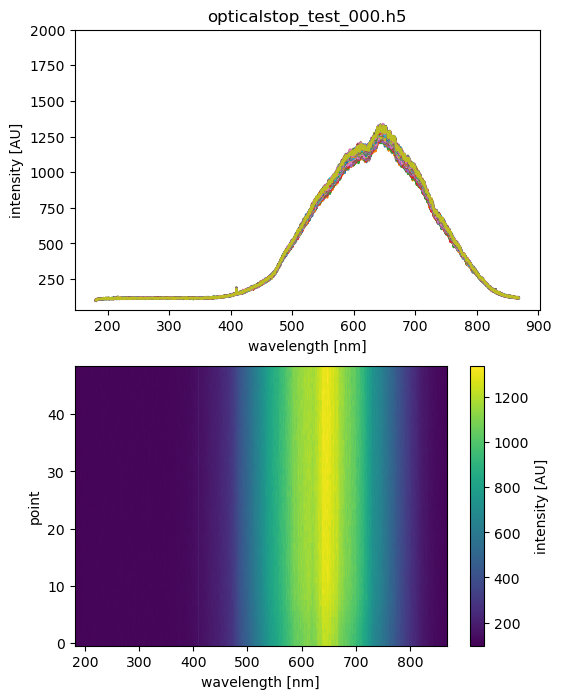

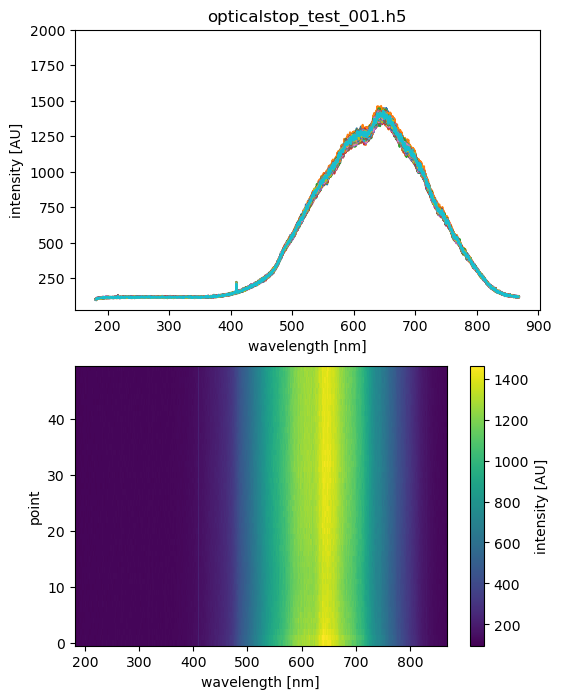

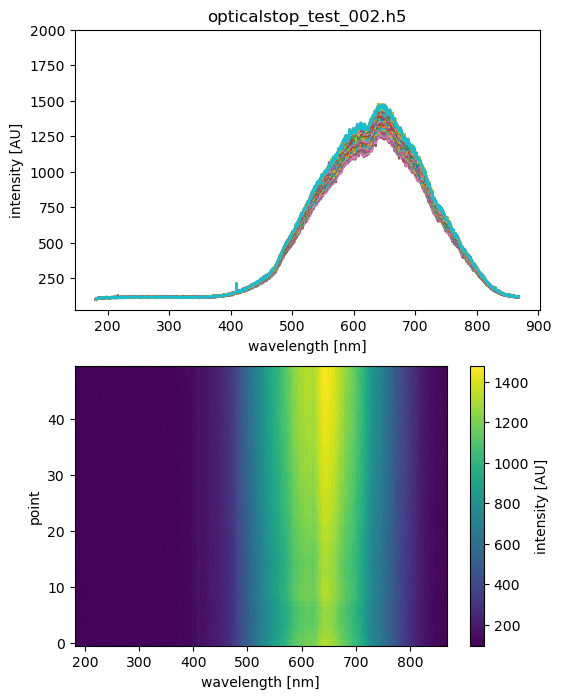

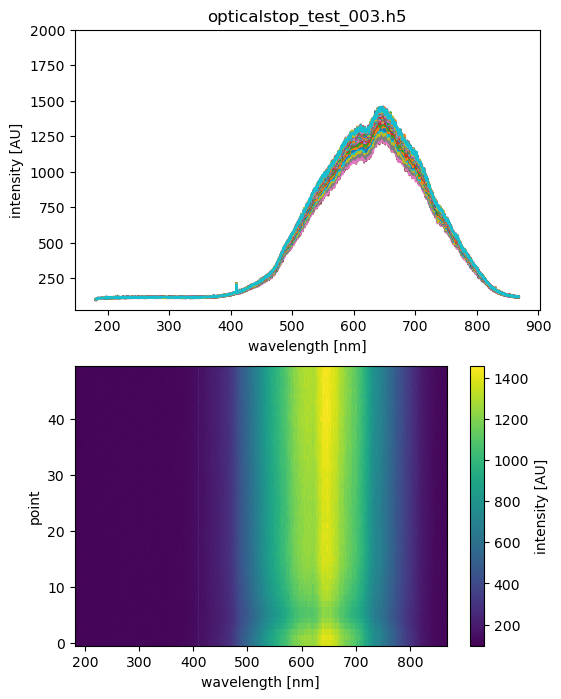

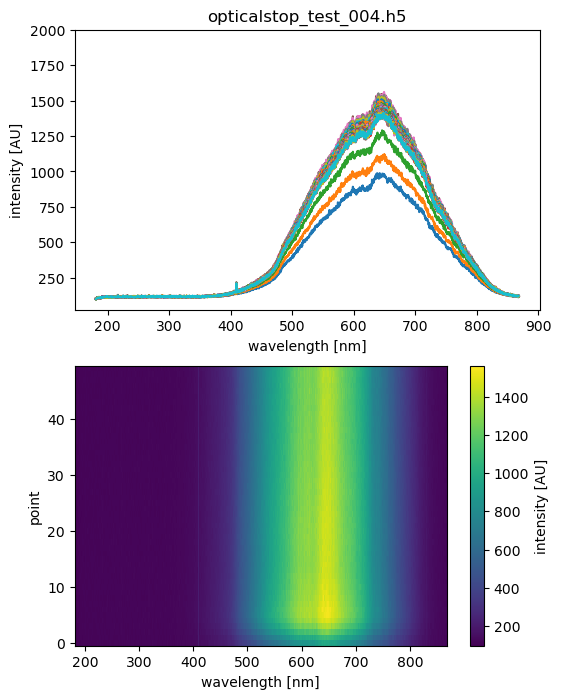

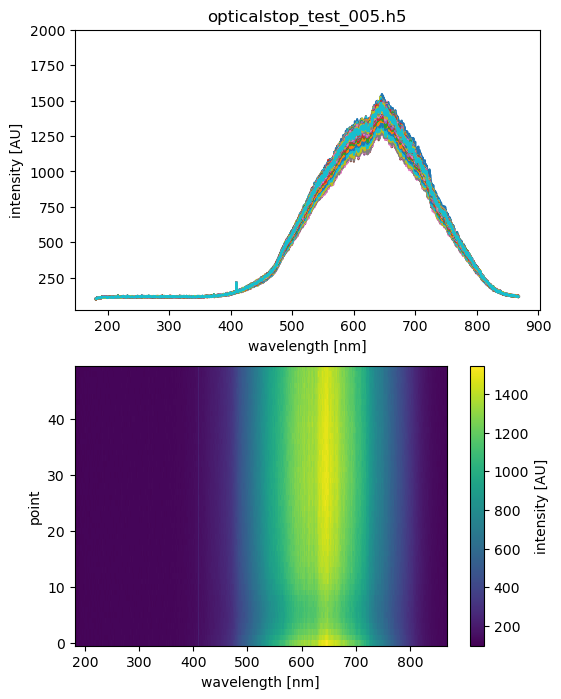

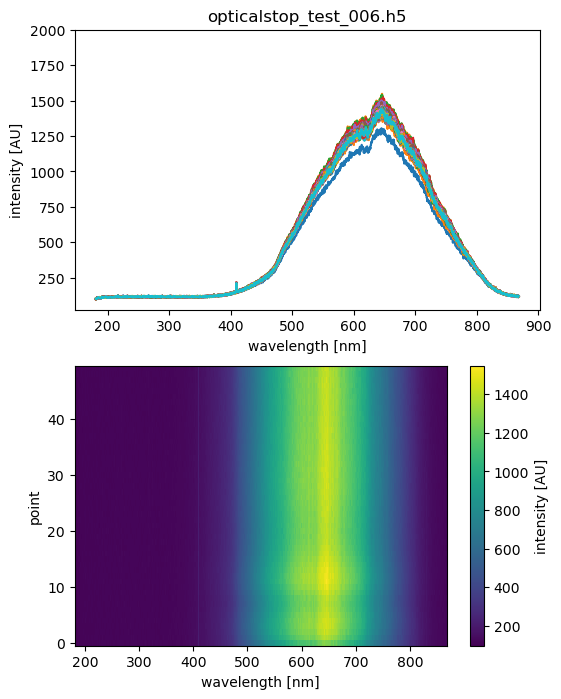

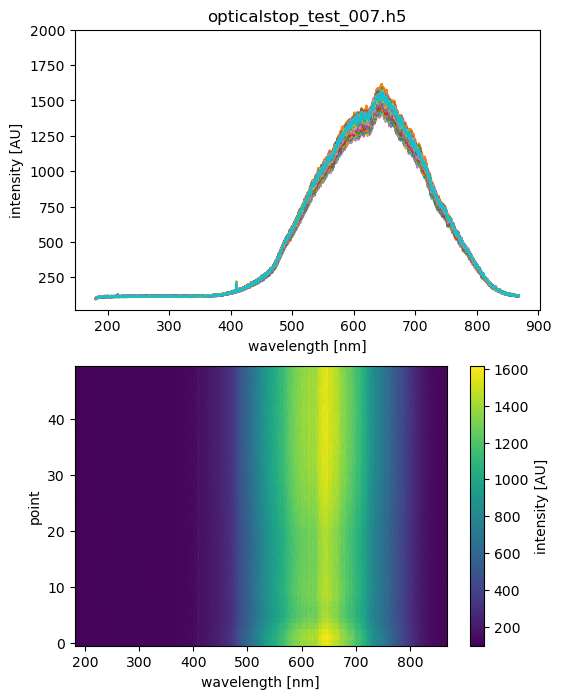

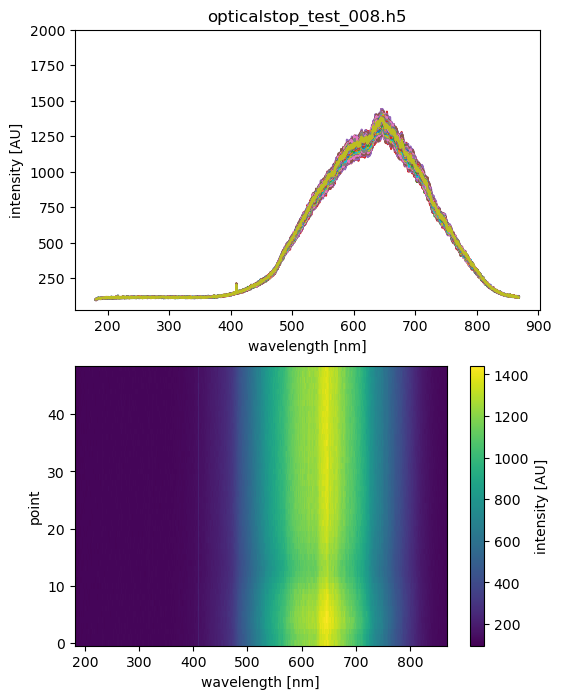

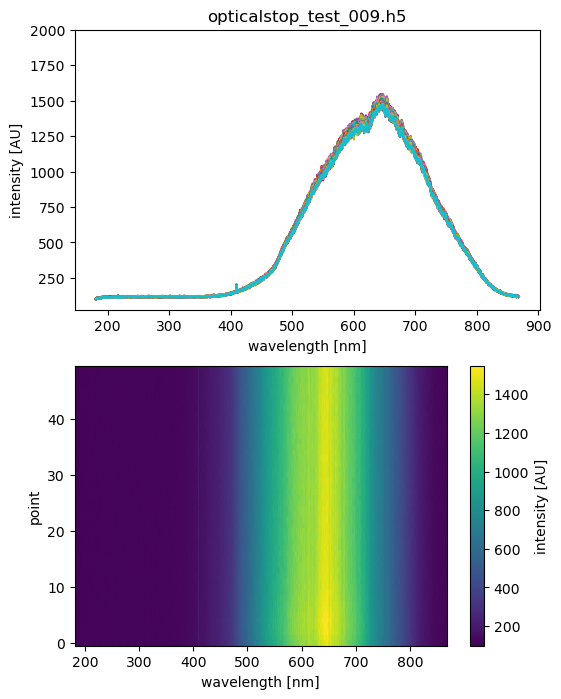

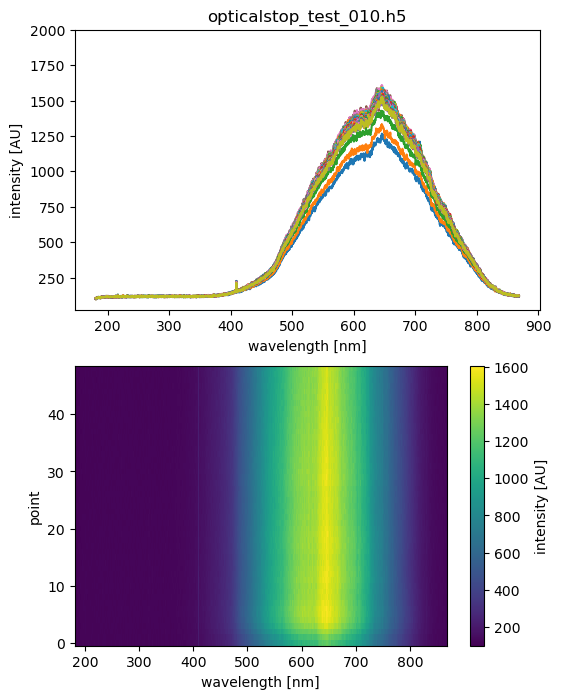

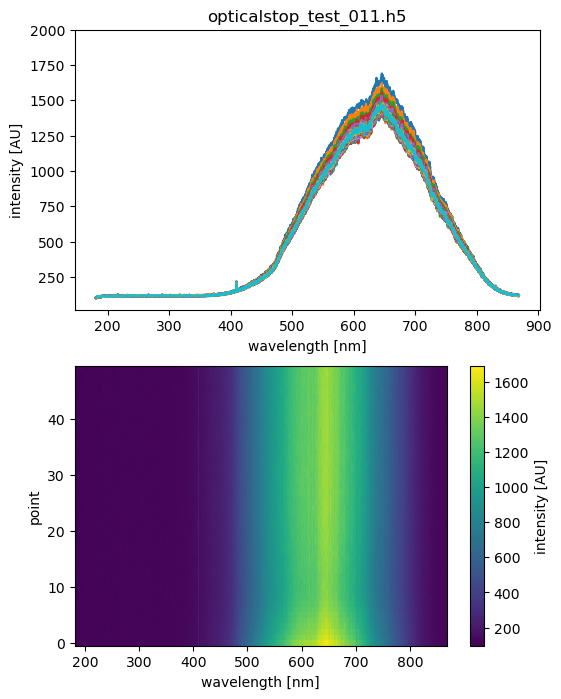

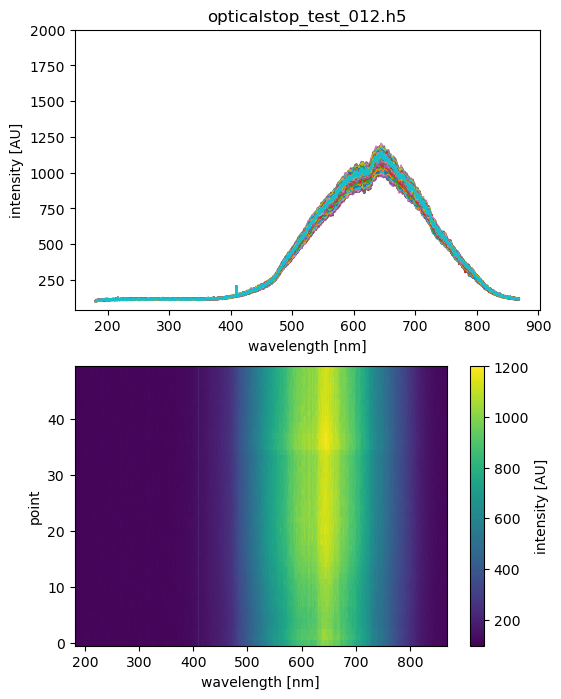

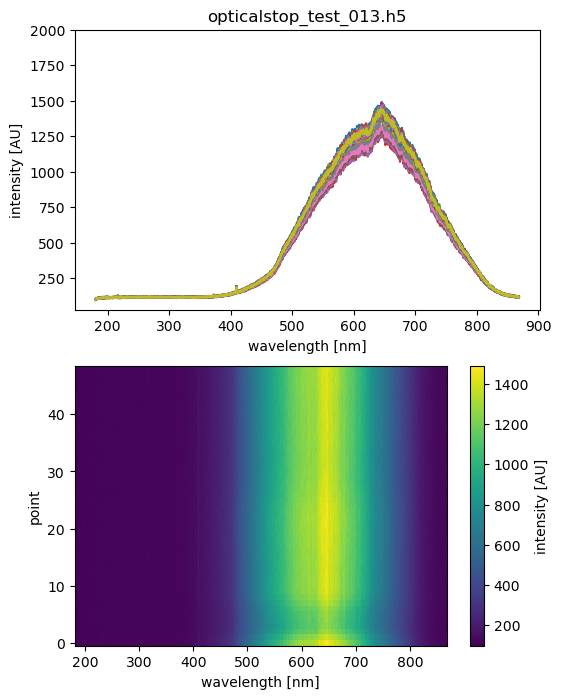

In [19]:
ds_list = []
μ_measurements = []
σ_measurements = []
for fname in sorted(base_path.glob('Reproducibility/*h5'))[:-1]:
    with h5py.File(fname,'r') as h5:
        key = list(h5.keys())[0]
        data = h5[key][()][:,:,1:]
        ds_static_list = []
        for point in data:
            da = xr.DataArray(point[1],dims=['wavelength'],coords={'wavelength':point[0]},name='intensity')
            da.attrs['units'] = 'AU'
            da.wavelength.attrs['units'] = 'nm'
          
            ds_static_list.append(da)
        
        ds = xr.Dataset()
        ds['intensity'] = xr.concat(ds_static_list,dim='point')
        ds['fname'] = fname.parts[-1]
        ds_list.append(ds)
        μ_measurements.append(ds['intensity'].mean(axis=0).values)
        σ_measurements.append(ds['intensity'].std(axis=0).values)
        
        fig,axes = plt.subplots(2,1,figsize=(6,8))
        plt.sca(axes[0])
        ds.intensity.plot.line(x='wavelength',add_legend=False)
        plt.gca().set(ylim=(None,2000),title=fname.parts[-1])
        
        plt.sca(axes[1])
        ds.intensity.plot(x='wavelength')#,vmin=95, vmax=2000)
fig.savefig("example_time_series.png",dpi=300)

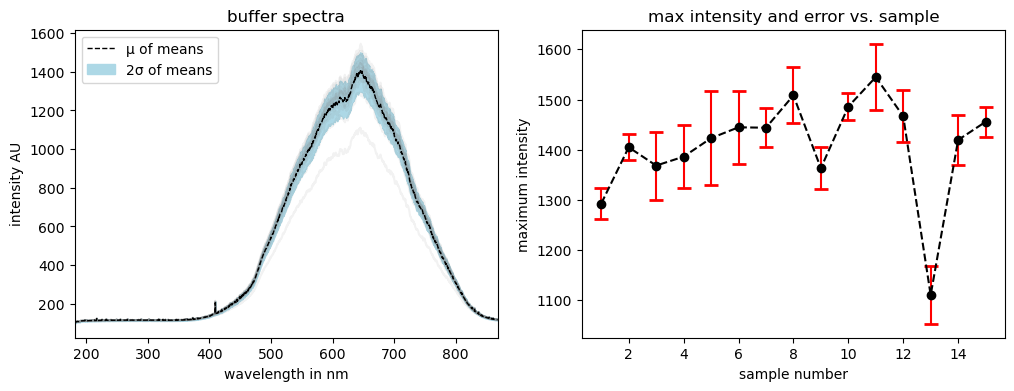

In [4]:
# Summary of the datasets
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(len(μ_measurements)):
    ax[0].plot(da.wavelength.values,μ_measurements[i],c='gray',alpha=0.1)#,label=f'scan {str(i+1).zfill(2)}')

mean_μ = np.mean(μ_measurements,axis=0)
mean_σ = np.mean(σ_measurements,axis=0)
λ  = da.wavelength.values
ax[0].plot(λ, mean_μ, c='k',linewidth=1,linestyle='--',label='μ of means')
ax[0].fill_between(λ, mean_μ, mean_μ+2*mean_σ,color='lightblue',label='2σ of means')
ax[0].fill_between(λ, mean_μ, mean_μ-2*mean_σ,color='lightblue')

ax[0].set(
    xlabel='wavelength in nm',
    ylabel='intensity AU',
    title ='buffer spectra',
    xlim=(min(da.wavelength.values),max(da.wavelength.values))
)
ax[0].legend()


ax[1].errorbar(np.linspace(1,15,15),[np.max(i) for i in μ_measurements],[np.max(i) for i in σ_measurements]
               ,ecolor='r',capsize=5,capthick=2,marker='o',linestyle='--',c='k')
ax[1].set(
    xlabel='sample number',
    ylabel='maximum intensity',
    title ='max intensity and error vs. sample',
)
fig.savefig("BufferSolutionReproducibility.png",dpi=300)

## Rinse/Air data series

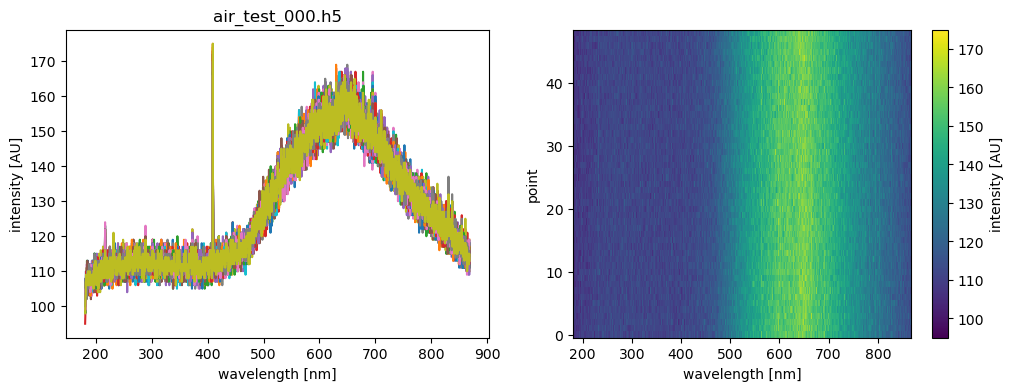

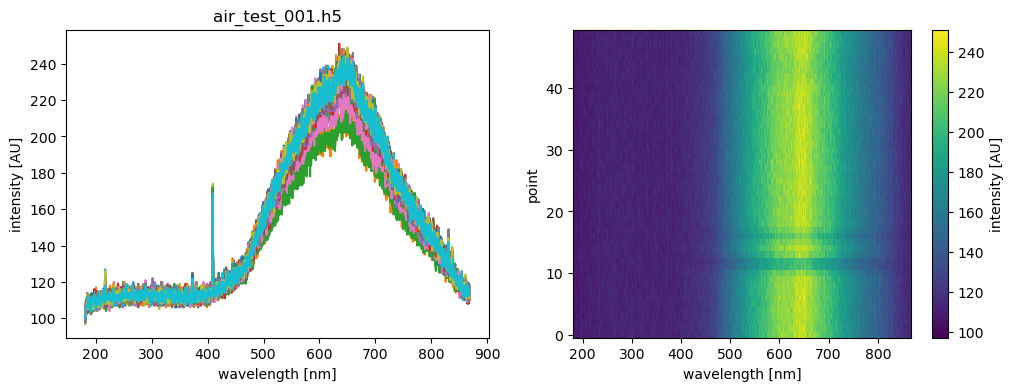

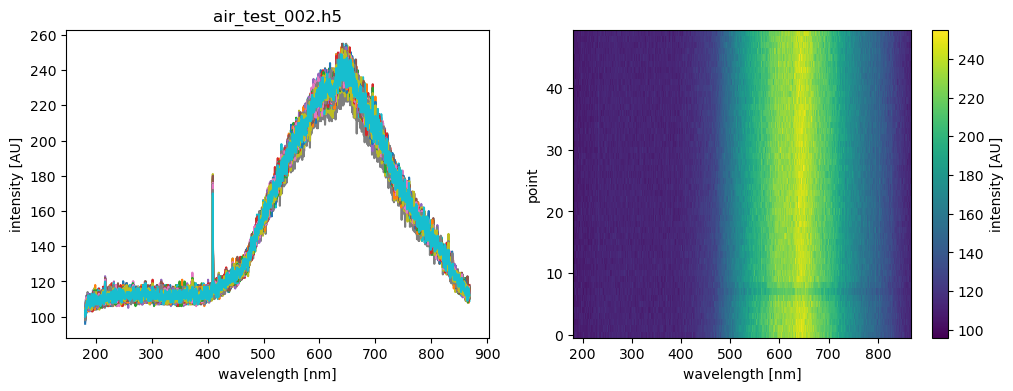

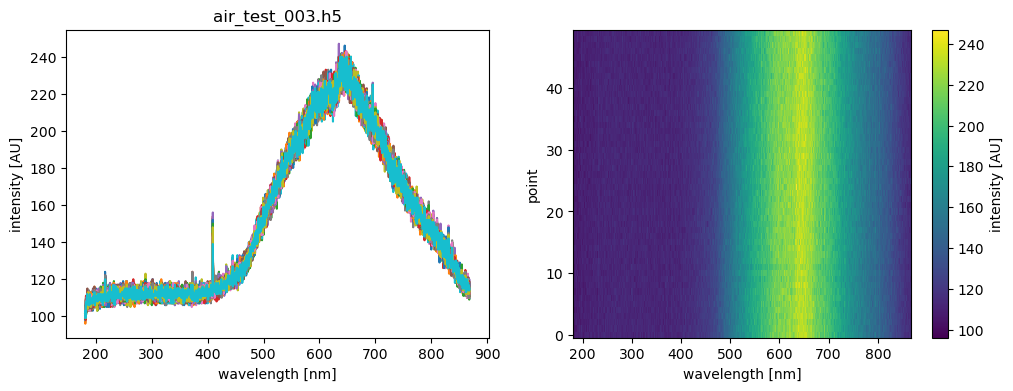

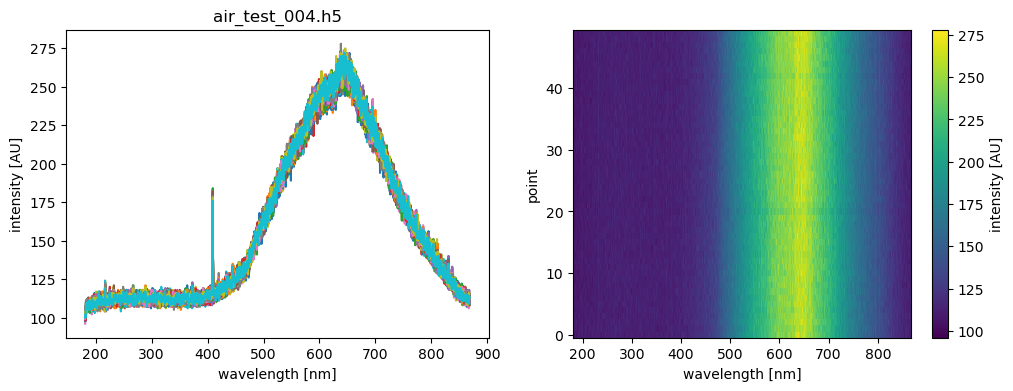

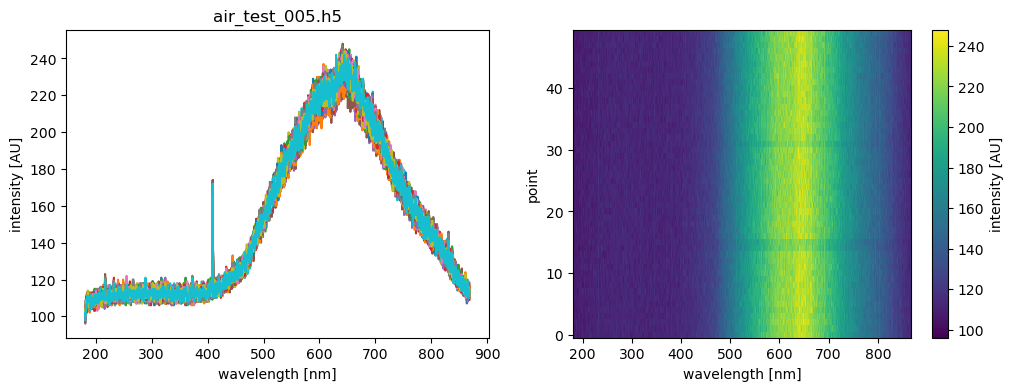

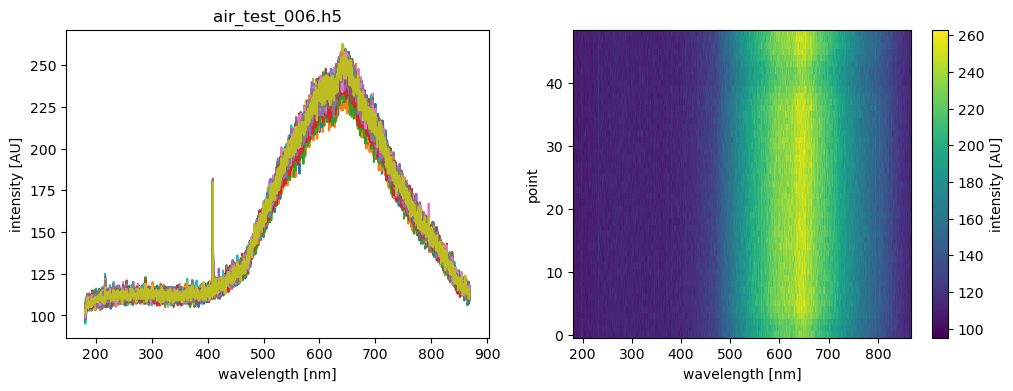

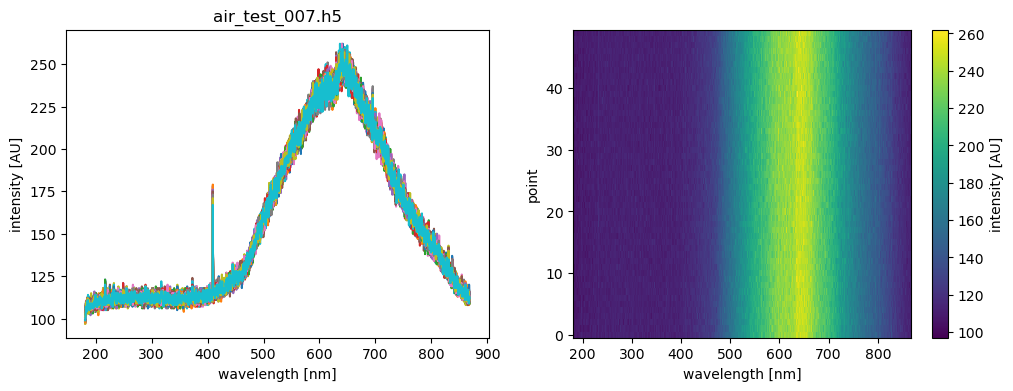

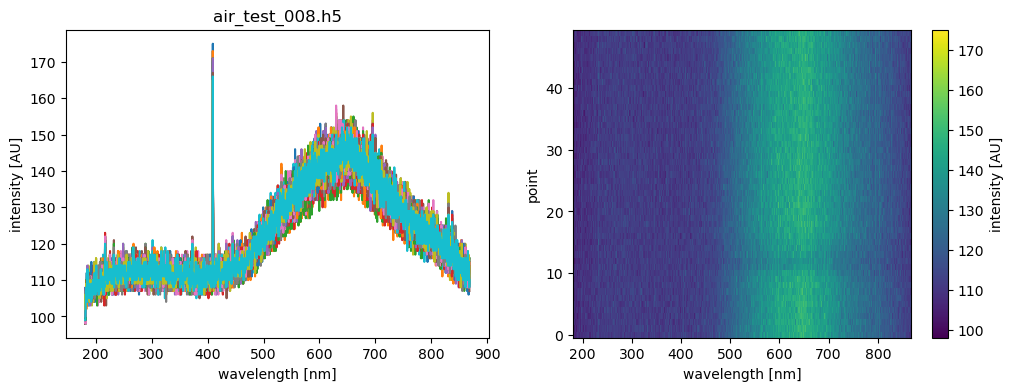

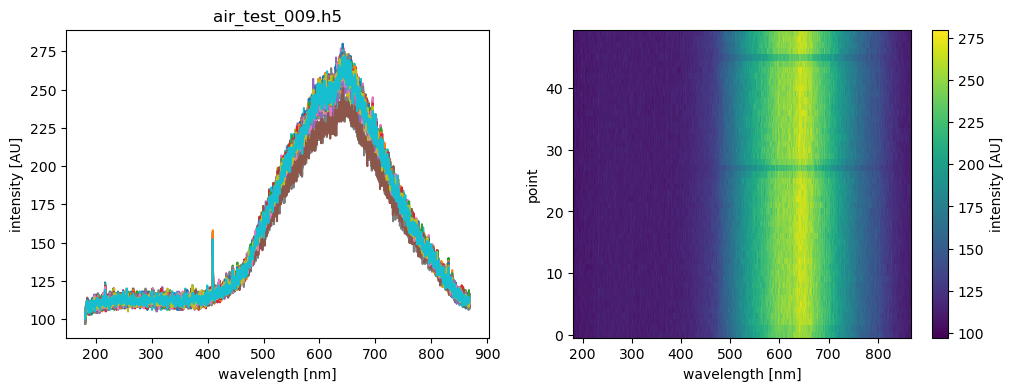

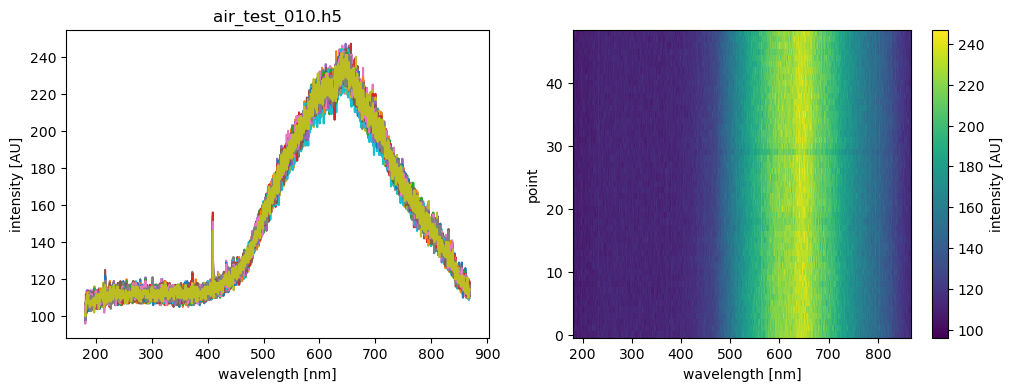

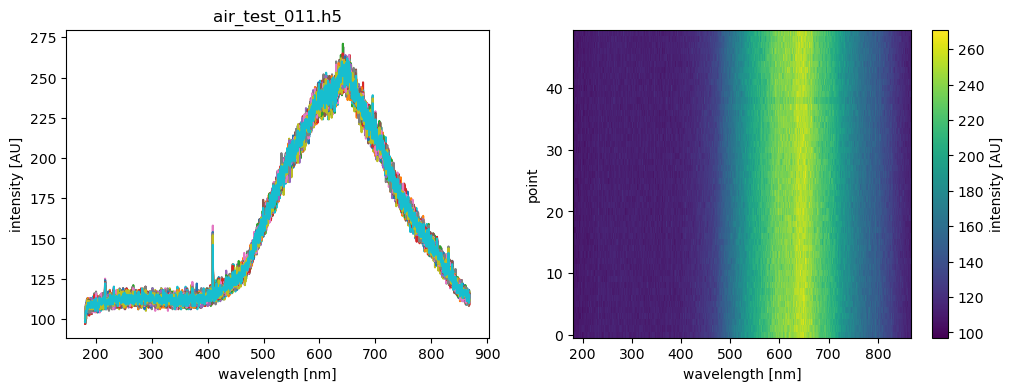

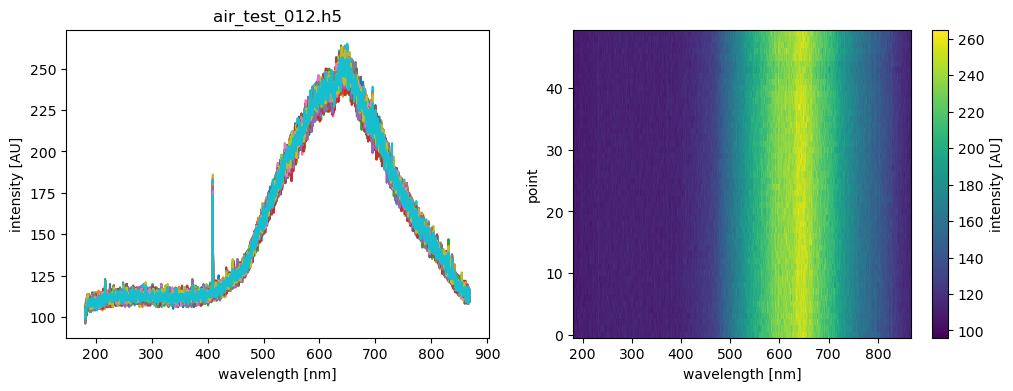

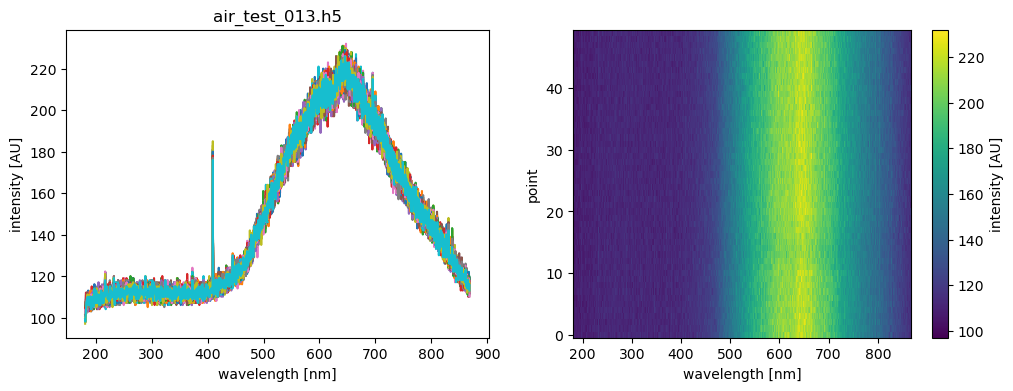

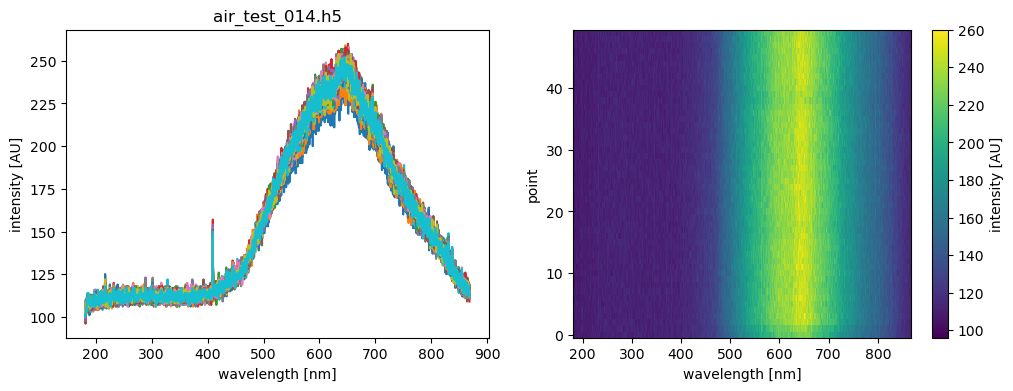

In [6]:
ds_list = []
μ_measurements = []
σ_measurements = []
for fname in sorted(base_path.glob('Air_Test/*h5')):
    with h5py.File(fname,'r') as h5:
        key = list(h5.keys())[0]
        data = h5[key][()][:,:,1:]
        ds_static_list = []
        for point in data:
            da = xr.DataArray(point[1],dims=['wavelength'],coords={'wavelength':point[0]},name='intensity')
            da.attrs['units'] = 'AU'
            da.wavelength.attrs['units'] = 'nm'
          
            ds_static_list.append(da)
        
        ds = xr.Dataset()
        ds['intensity'] = xr.concat(ds_static_list,dim='point')
        ds['fname'] = fname.parts[-1]
        ds_list.append(ds)
        μ_measurements.append(ds['intensity'].mean(axis=0).values)
        σ_measurements.append(ds['intensity'].std(axis=0).values)
        
        fig,axes = plt.subplots(1,2,figsize=(12,4))
        plt.sca(axes[0])
        ds.intensity.plot.line(x='wavelength',add_legend=False)
        plt.gca().set(title=fname.parts[-1])
        
        plt.sca(axes[1])
        ds.intensity.plot(x='wavelength')#,vmin=95, vmax=2000)

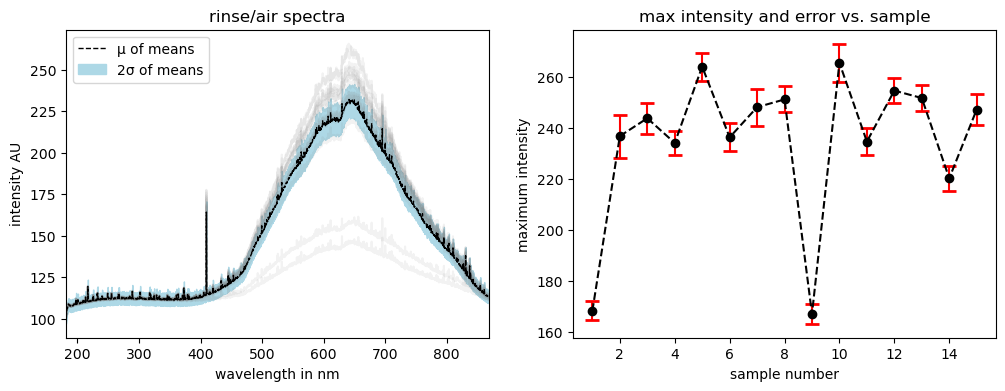

In [7]:
# Summary of the datasets
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(len(μ_measurements)):
    ax[0].plot(da.wavelength.values,μ_measurements[i],c='gray',alpha=0.1)#,label=f'scan {str(i+1).zfill(2)}')

mean_μ = np.mean(μ_measurements,axis=0)
mean_σ = np.mean(σ_measurements,axis=0)
λ  = da.wavelength.values
ax[0].plot(λ, mean_μ, c='k',linewidth=1,linestyle='--',label='μ of means')
ax[0].fill_between(λ, mean_μ, mean_μ+2*mean_σ,color='lightblue',label='2σ of means')
ax[0].fill_between(λ, mean_μ, mean_μ-2*mean_σ,color='lightblue')

ax[0].set(
    xlabel='wavelength in nm',
    ylabel='intensity AU',
    title ='rinse/air spectra',
    xlim=(min(da.wavelength.values),max(da.wavelength.values))
)
ax[0].legend()


ax[1].errorbar(np.linspace(1,15,15),[np.max(i) for i in μ_measurements],[np.max(i) for i in σ_measurements]
               ,ecolor='r',capsize=5,capthick=2,marker='o',linestyle='--',c='k')
ax[1].set(
    xlabel='sample number',
    ylabel='maximum intensity',
    title ='max intensity and error vs. sample',
)
fig.savefig("Rinse_emptycell_Reproducibility.png",dpi=300)

## Light Source Stability

this was done over 1.5 hours at 0, 30, 60, and 90 minutes of the light source being on

### time 00 min

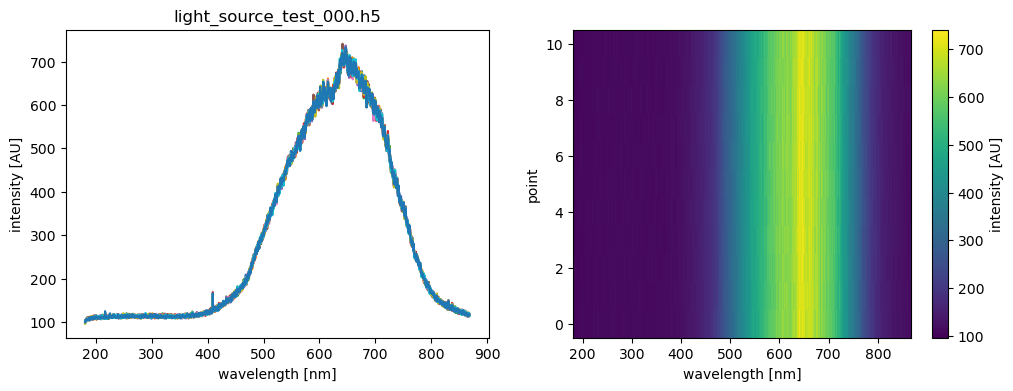

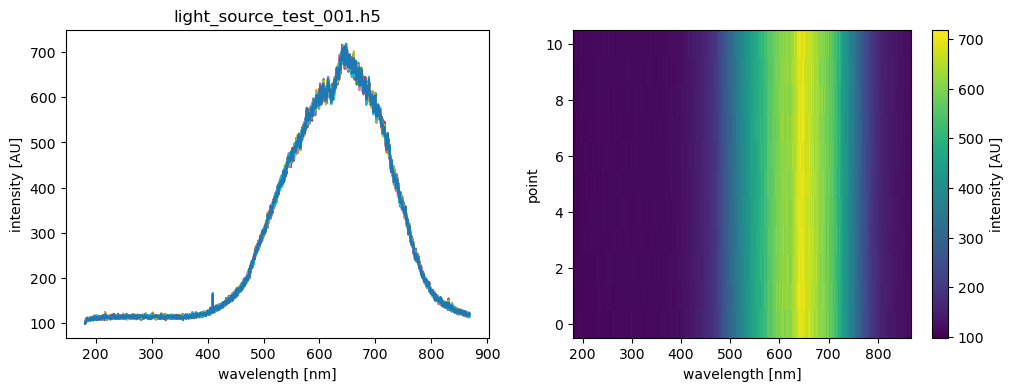

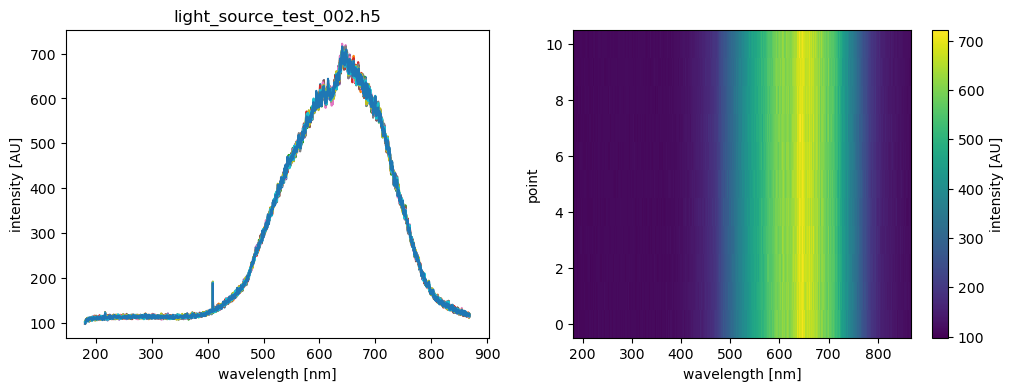

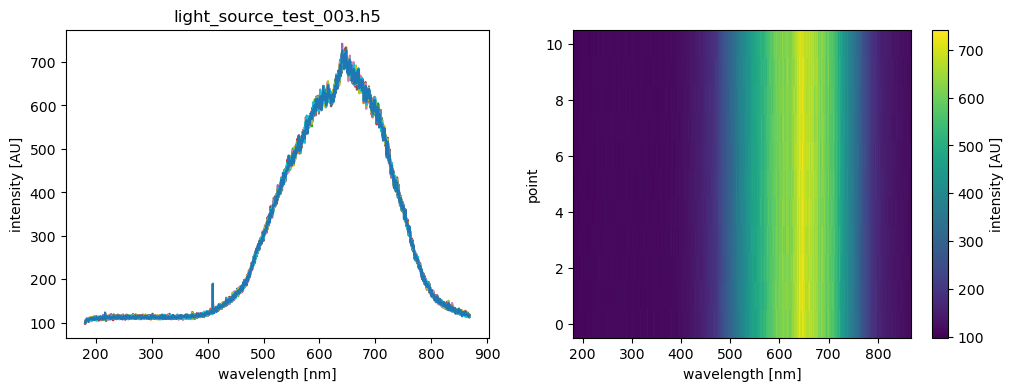

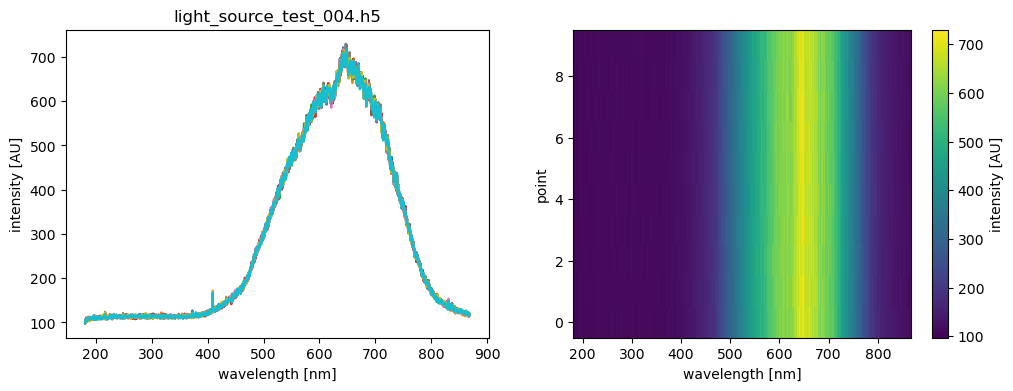

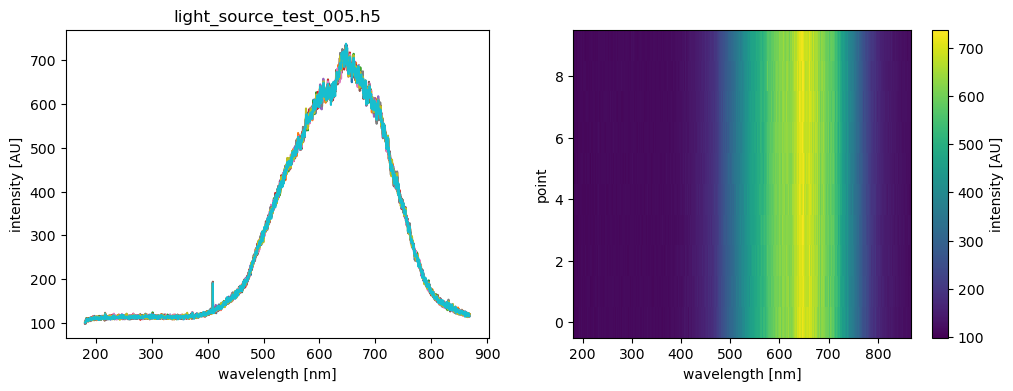

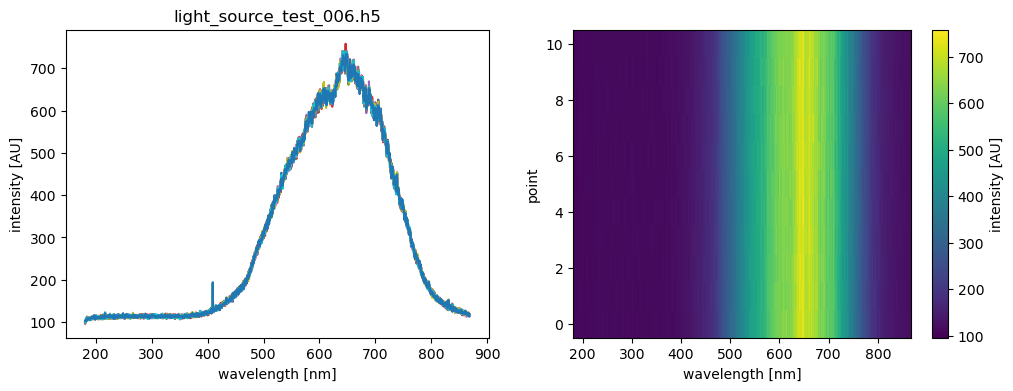

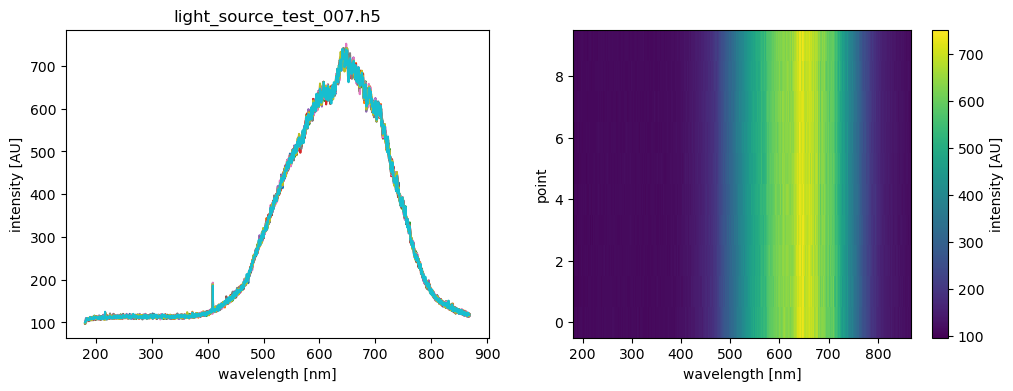

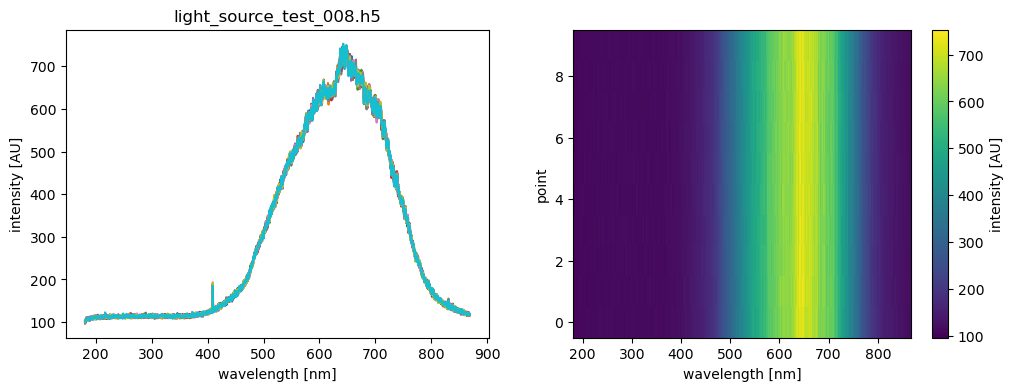

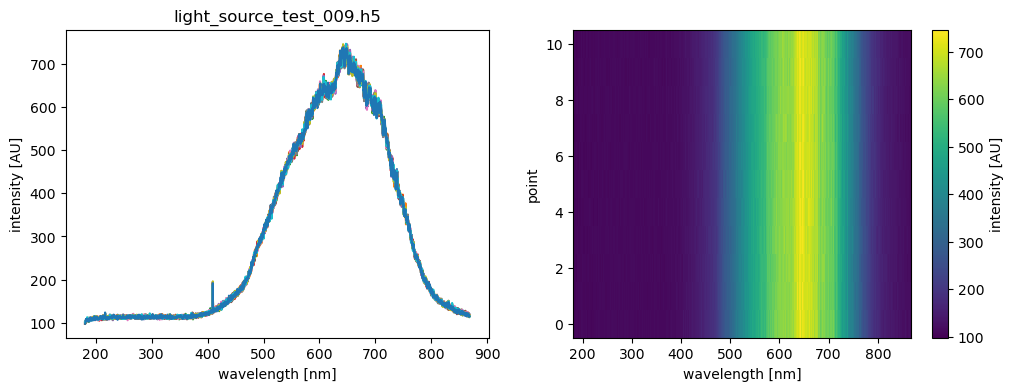

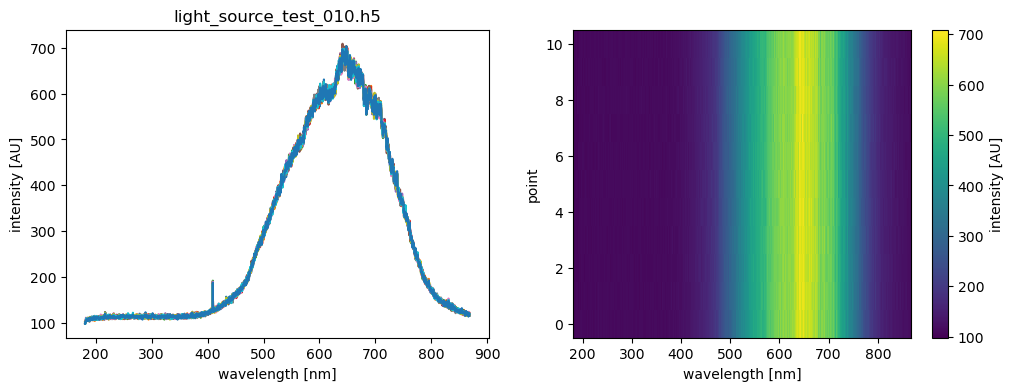

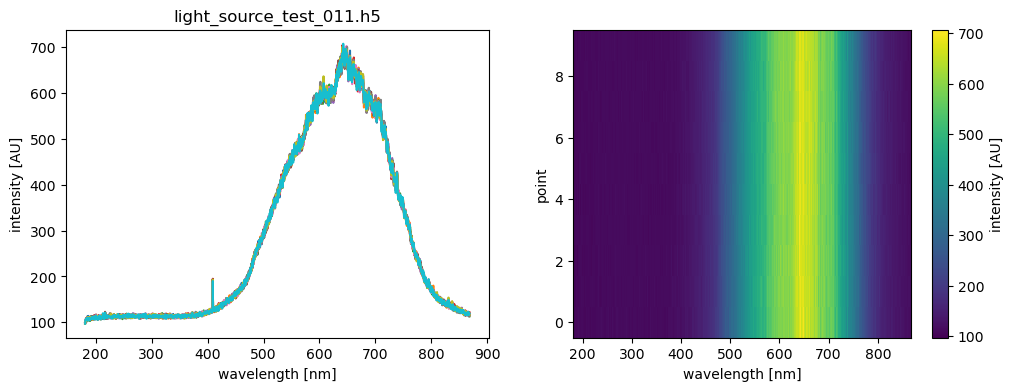

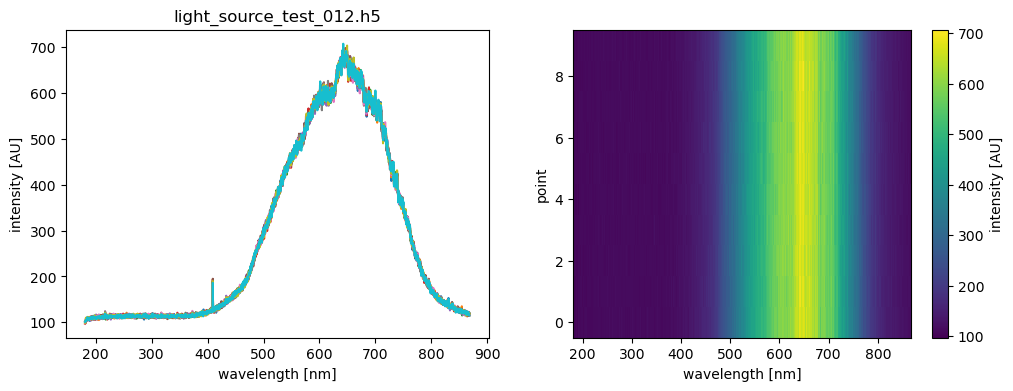

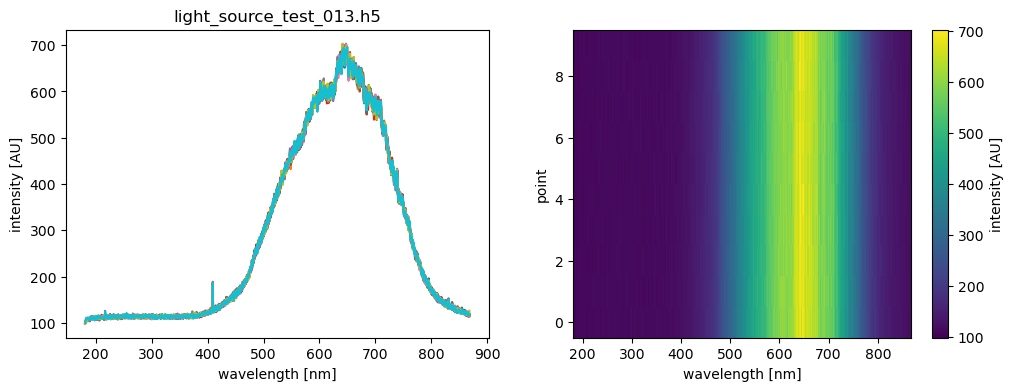

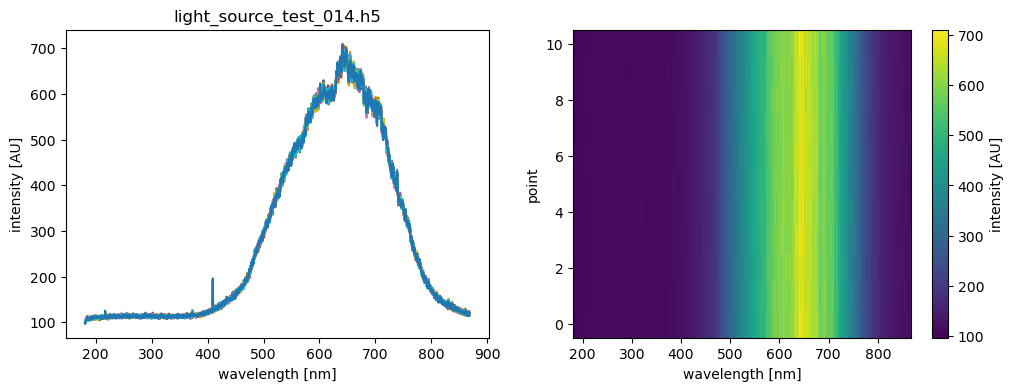

In [8]:
ds_list = []
μ_measurements = []
σ_measurements = []
for fname in sorted(base_path.glob('LightSource_1/*h5')):
    with h5py.File(fname,'r') as h5:
        key = list(h5.keys())[0]
        data = h5[key][()][:,:,1:]
        ds_static_list = []
        for point in data:
            da = xr.DataArray(point[1],dims=['wavelength'],coords={'wavelength':point[0]},name='intensity')
            da.attrs['units'] = 'AU'
            da.wavelength.attrs['units'] = 'nm'
          
            ds_static_list.append(da)
        
        ds = xr.Dataset()
        ds['intensity'] = xr.concat(ds_static_list,dim='point')
        ds['fname'] = fname.parts[-1]
        ds_list.append(ds)
        μ_measurements.append(ds['intensity'].mean(axis=0).values)
        σ_measurements.append(ds['intensity'].std(axis=0).values)
        
        fig,axes = plt.subplots(1,2,figsize=(12,4))
        plt.sca(axes[0])
        ds.intensity.plot.line(x='wavelength',add_legend=False)
        plt.gca().set(title=fname.parts[-1])
        
        plt.sca(axes[1])
        ds.intensity.plot(x='wavelength')#,vmin=95, vmax=2000)

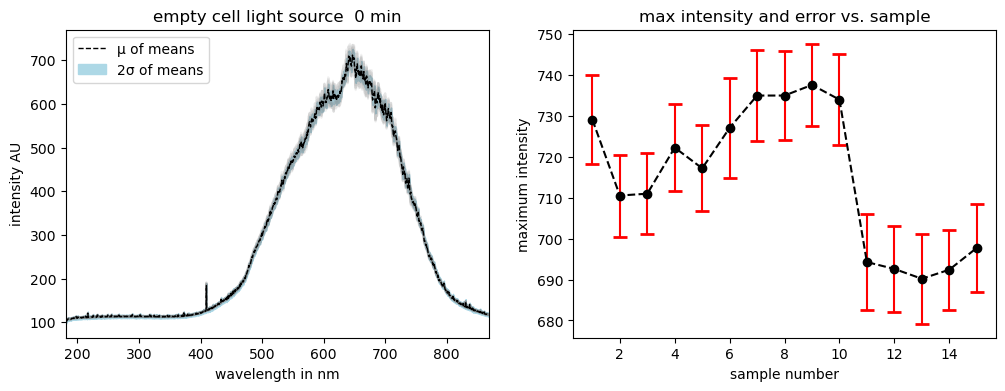

In [11]:
# Summary of the datasets
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(len(μ_measurements)):
    ax[0].plot(da.wavelength.values,μ_measurements[i],c='gray',alpha=0.1)#,label=f'scan {str(i+1).zfill(2)}')

mean_μ = np.mean(μ_measurements,axis=0)
mean_σ = np.mean(σ_measurements,axis=0)
λ  = da.wavelength.values
ax[0].plot(λ, mean_μ, c='k',linewidth=1,linestyle='--',label='μ of means')
ax[0].fill_between(λ, mean_μ, mean_μ+2*mean_σ,color='lightblue',label='2σ of means')
ax[0].fill_between(λ, mean_μ, mean_μ-2*mean_σ,color='lightblue')

ax[0].set(
    xlabel='wavelength in nm',
    ylabel='intensity AU',
    title ='empty cell light source  0 min',
    xlim=(min(da.wavelength.values),max(da.wavelength.values))
)
ax[0].legend()


ax[1].errorbar(np.linspace(1,15,15),[np.max(i) for i in μ_measurements],[np.max(i) for i in σ_measurements]
               ,ecolor='r',capsize=5,capthick=2,marker='o',linestyle='--',c='k')
ax[1].set(
    xlabel='sample number',
    ylabel='maximum intensity',
    title ='max intensity and error vs. sample',
    # ylim  =(275,325) 
)
fig.savefig("LightsourceStability_00_min.png",dpi=300)

### 30 minutes

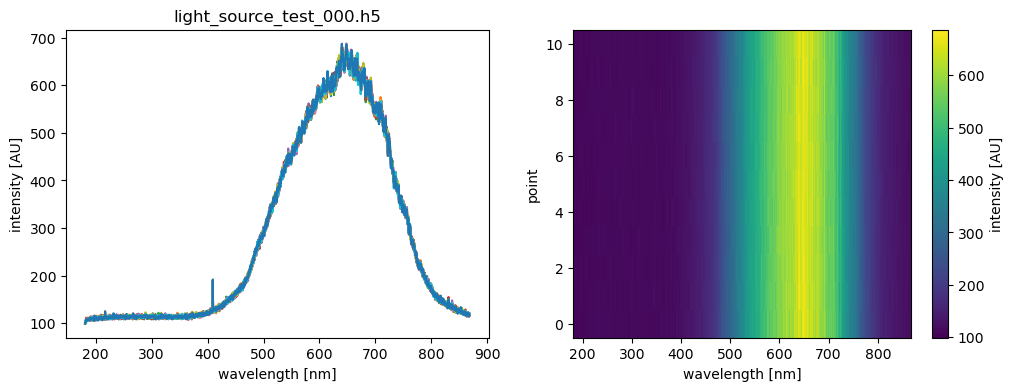

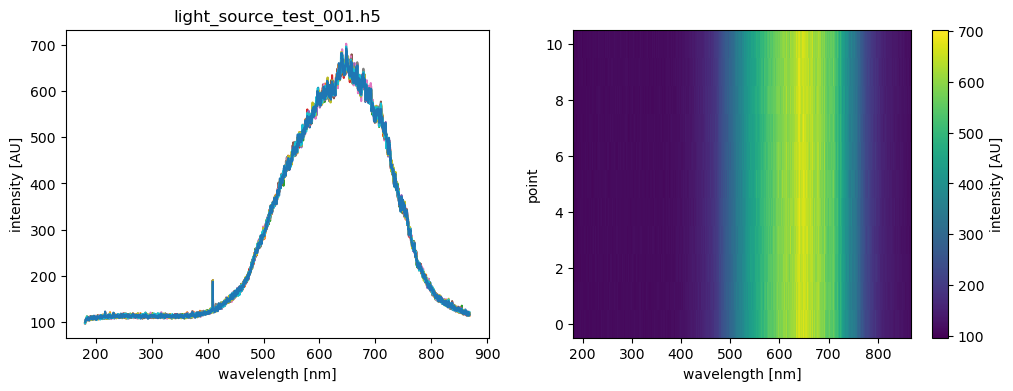

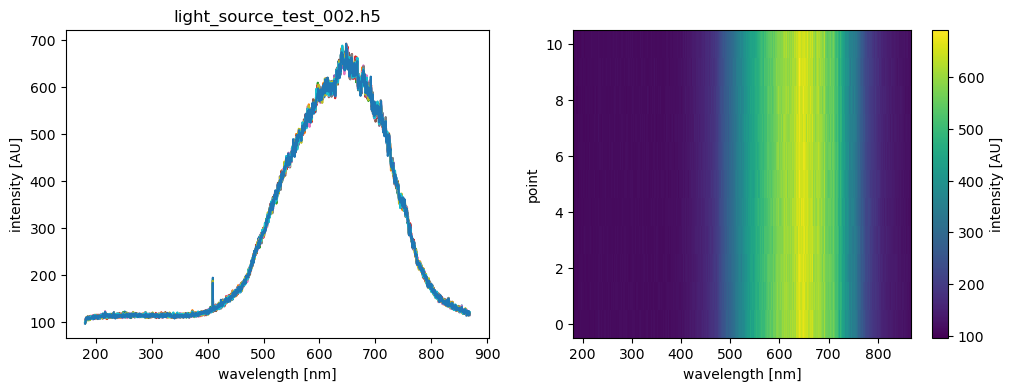

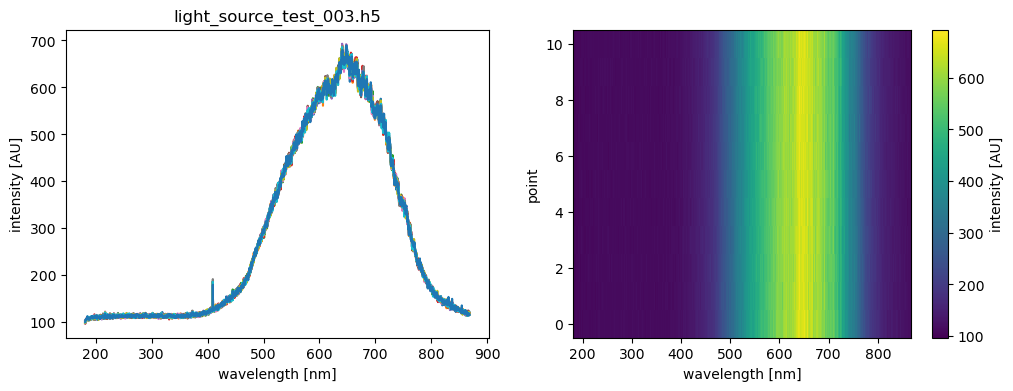

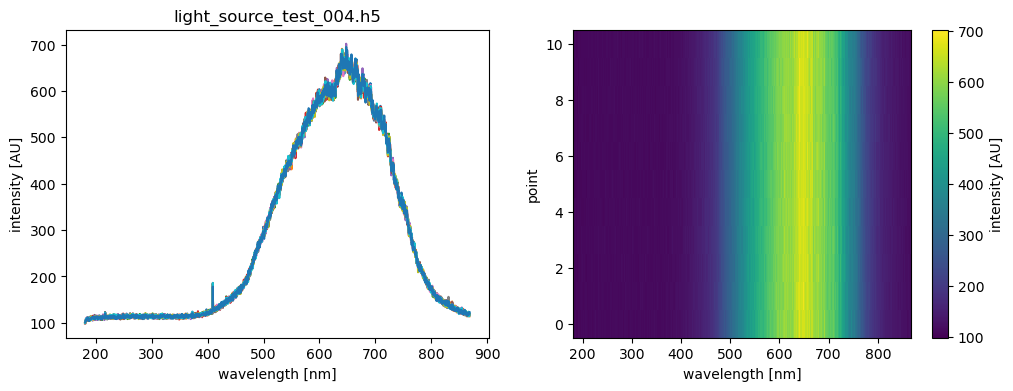

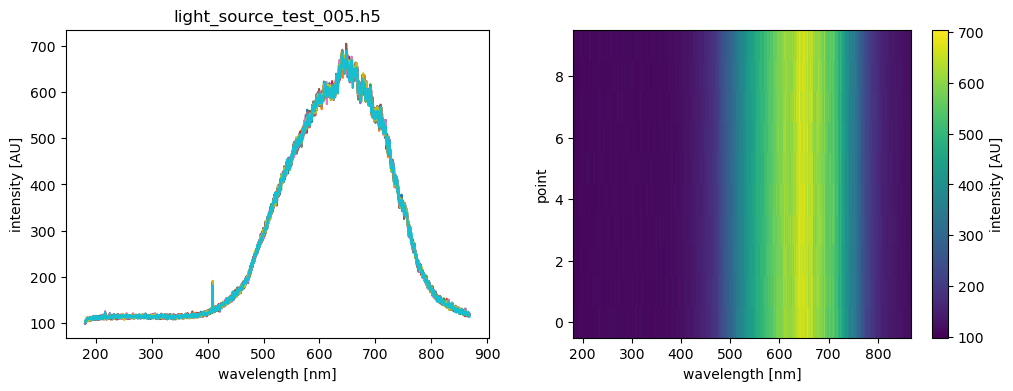

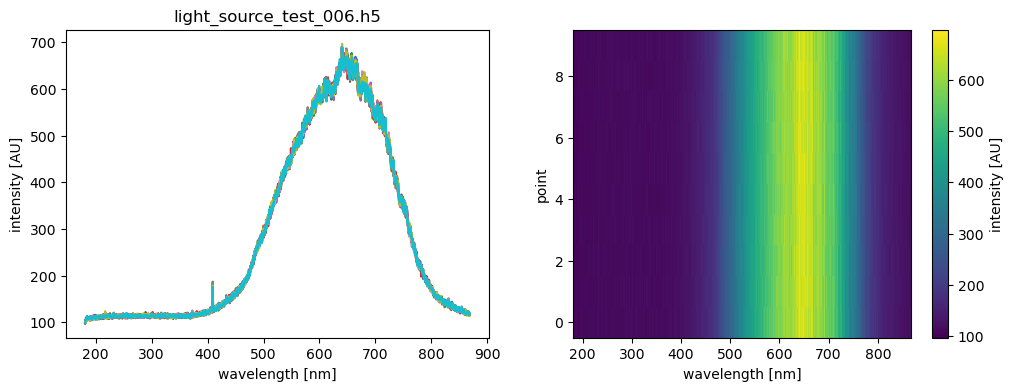

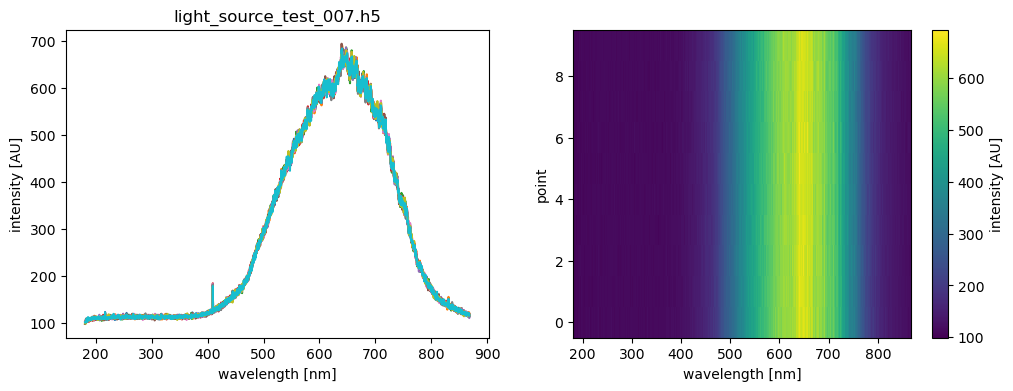

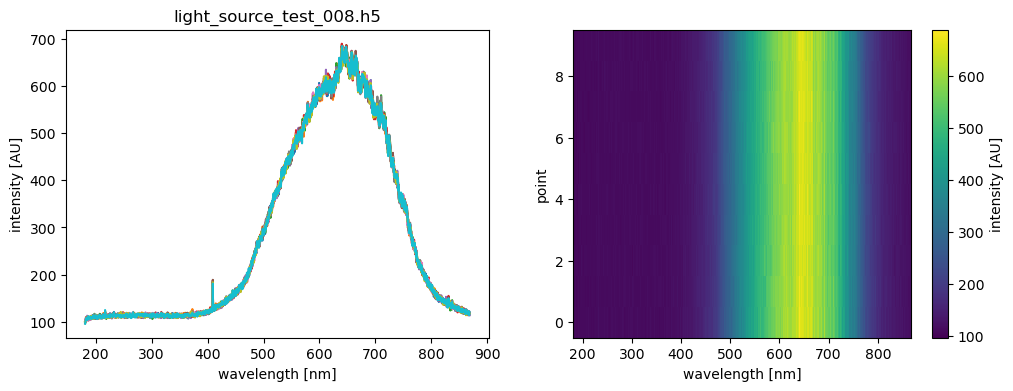

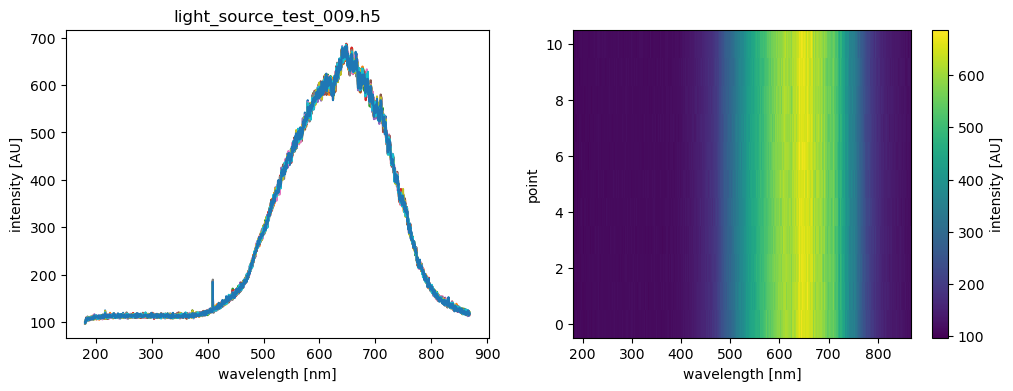

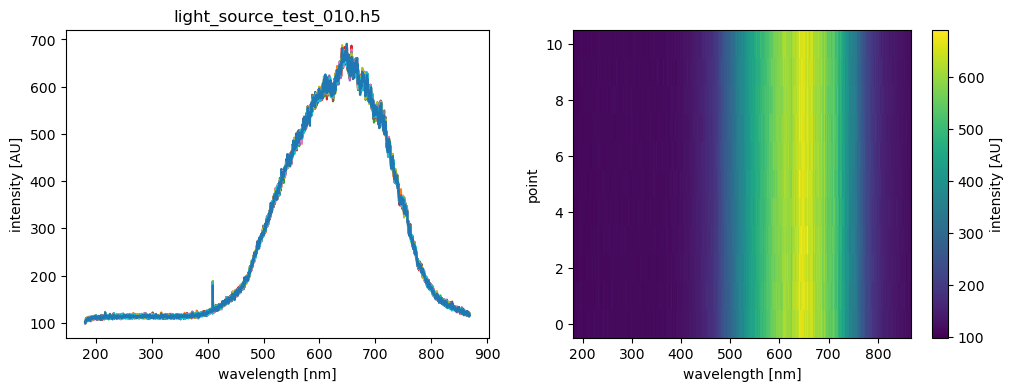

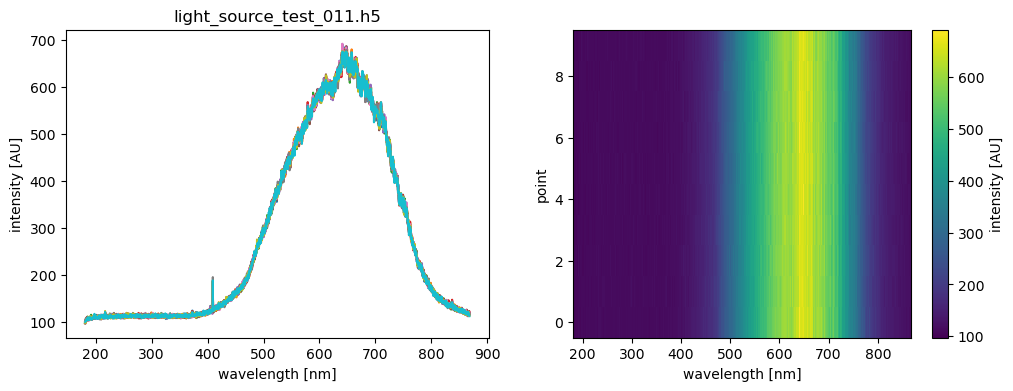

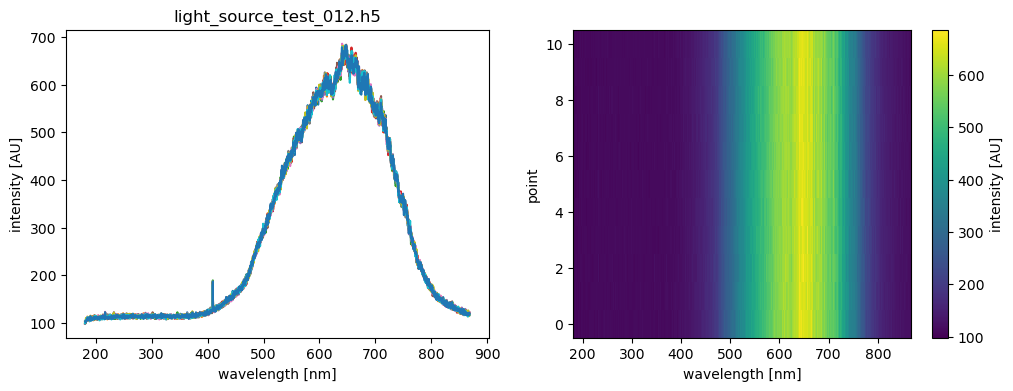

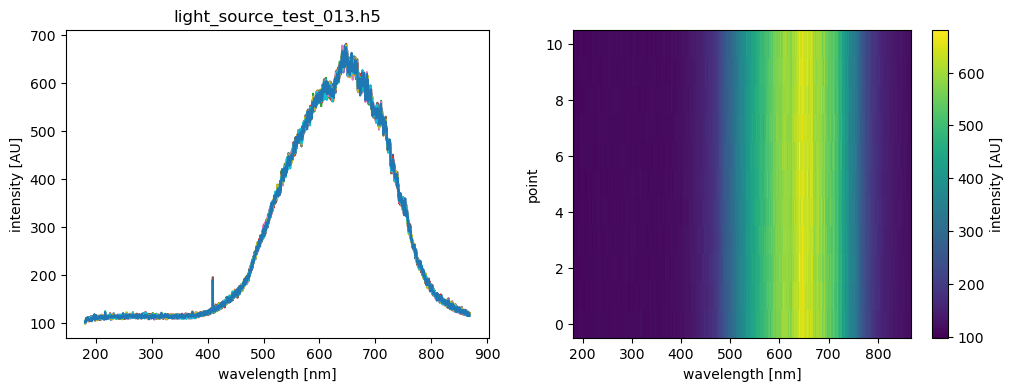

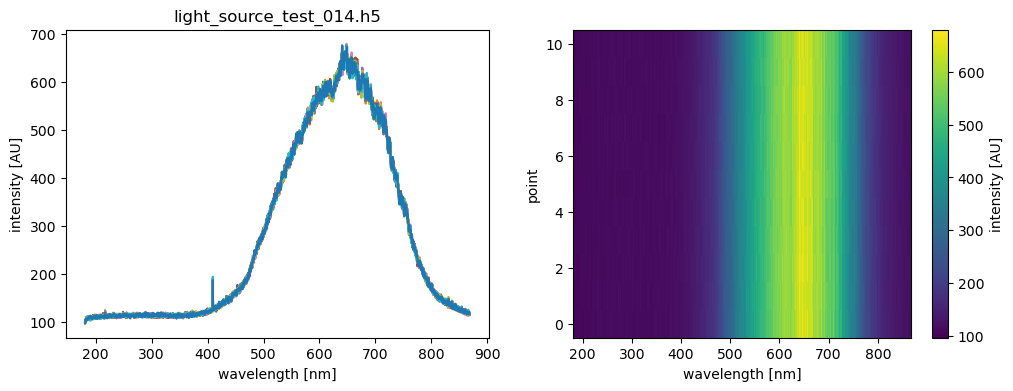

In [12]:
ds_list = []
μ_measurements = []
σ_measurements = []
for fname in sorted(base_path.glob('LightSource_2/*h5')):
    with h5py.File(fname,'r') as h5:
        key = list(h5.keys())[0]
        data = h5[key][()][:,:,1:]
        ds_static_list = []
        for point in data:
            da = xr.DataArray(point[1],dims=['wavelength'],coords={'wavelength':point[0]},name='intensity')
            da.attrs['units'] = 'AU'
            da.wavelength.attrs['units'] = 'nm'
          
            ds_static_list.append(da)
        
        ds = xr.Dataset()
        ds['intensity'] = xr.concat(ds_static_list,dim='point')
        ds['fname'] = fname.parts[-1]
        ds_list.append(ds)
        μ_measurements.append(ds['intensity'].mean(axis=0).values)
        σ_measurements.append(ds['intensity'].std(axis=0).values)
        
        fig,axes = plt.subplots(1,2,figsize=(12,4))
        plt.sca(axes[0])
        ds.intensity.plot.line(x='wavelength',add_legend=False)
        plt.gca().set(title=fname.parts[-1])
        
        plt.sca(axes[1])
        ds.intensity.plot(x='wavelength')#,vmin=95, vmax=2000)

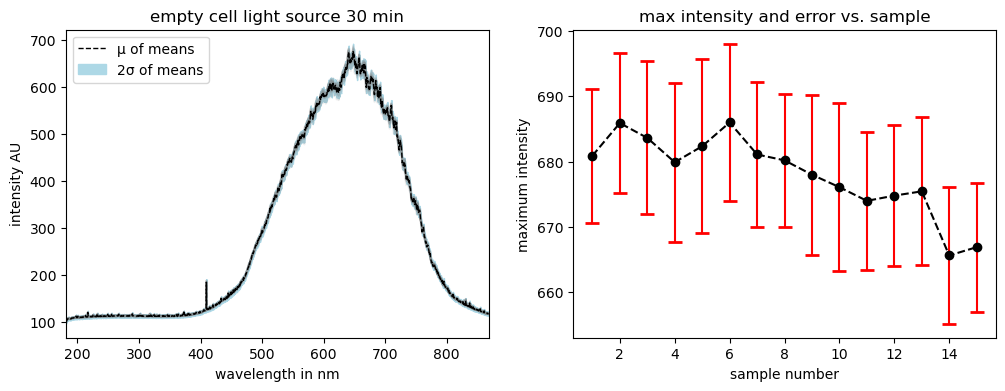

In [13]:
# Summary of the datasets
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(len(μ_measurements)):
    ax[0].plot(da.wavelength.values,μ_measurements[i],c='gray',alpha=0.1)#,label=f'scan {str(i+1).zfill(2)}')

mean_μ = np.mean(μ_measurements,axis=0)
mean_σ = np.mean(σ_measurements,axis=0)
λ  = da.wavelength.values
ax[0].plot(λ, mean_μ, c='k',linewidth=1,linestyle='--',label='μ of means')
ax[0].fill_between(λ, mean_μ, mean_μ+2*mean_σ,color='lightblue',label='2σ of means')
ax[0].fill_between(λ, mean_μ, mean_μ-2*mean_σ,color='lightblue')

ax[0].set(
    xlabel='wavelength in nm',
    ylabel='intensity AU',
    title ='empty cell light source 30 min',
    xlim=(min(da.wavelength.values),max(da.wavelength.values))
)
ax[0].legend()


ax[1].errorbar(np.linspace(1,15,15),[np.max(i) for i in μ_measurements],[np.max(i) for i in σ_measurements]
               ,ecolor='r',capsize=5,capthick=2,marker='o',linestyle='--',c='k')
ax[1].set(
    xlabel='sample number',
    ylabel='maximum intensity',
    title ='max intensity and error vs. sample',
    # ylim  =(275,325) 
)

fig.savefig("LightsourceStability_30_min.png",dpi=300)

### 60 minutes

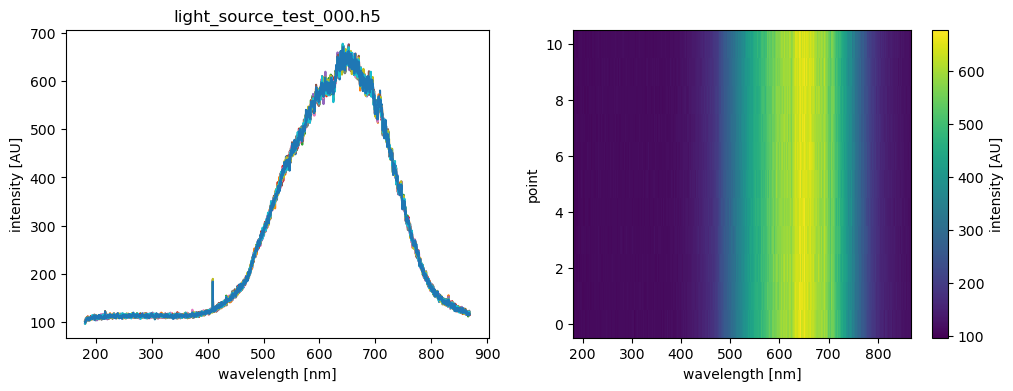

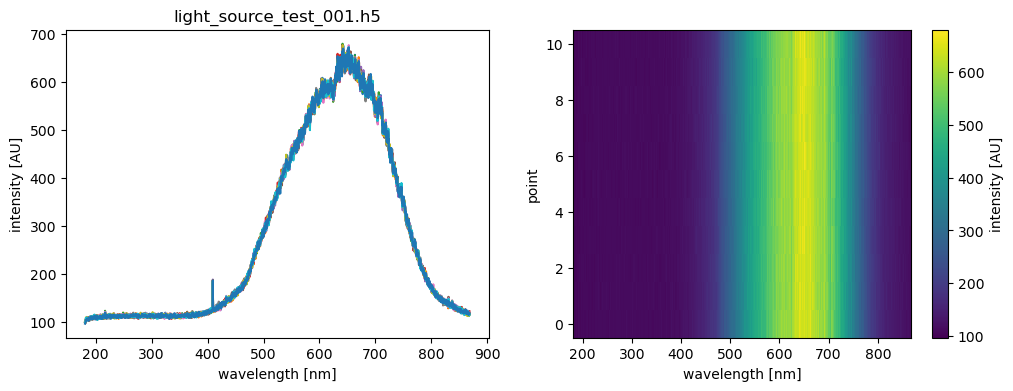

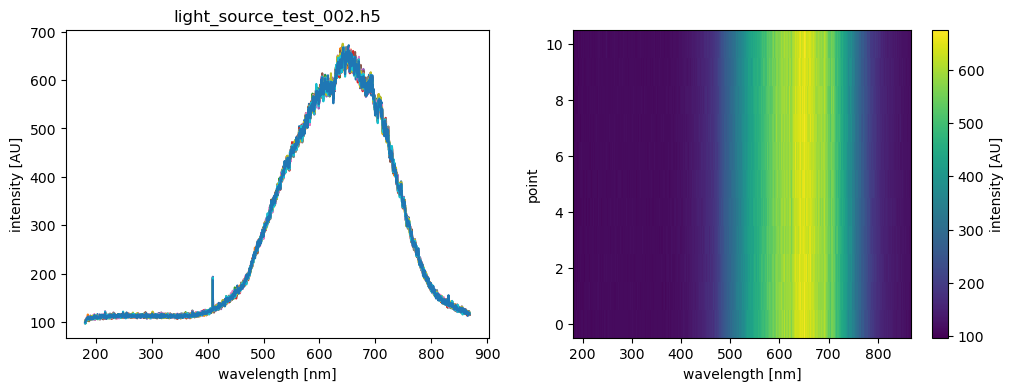

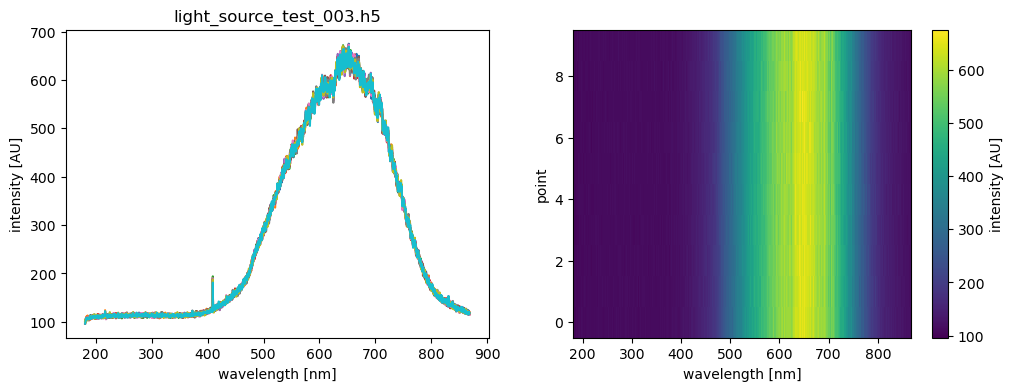

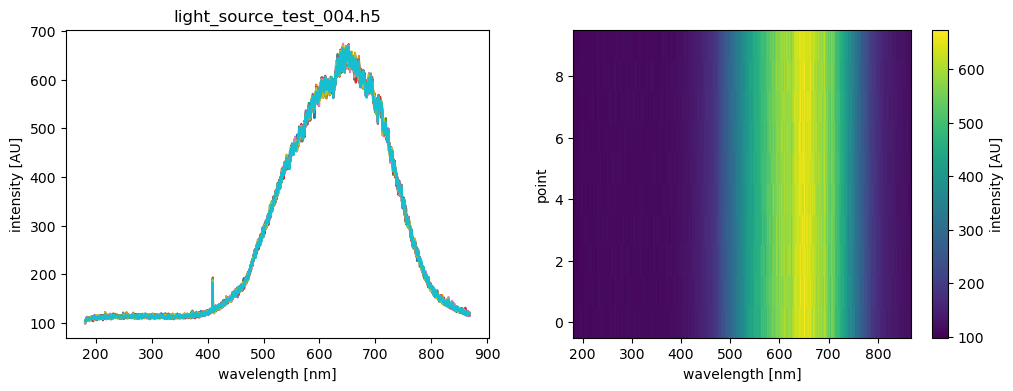

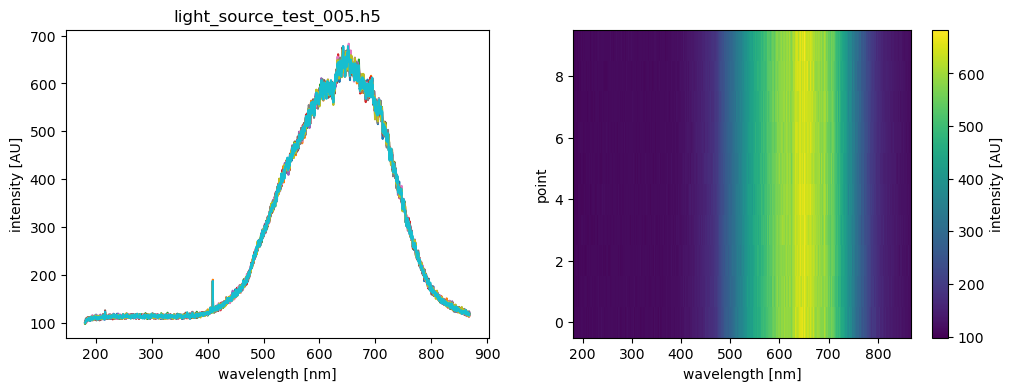

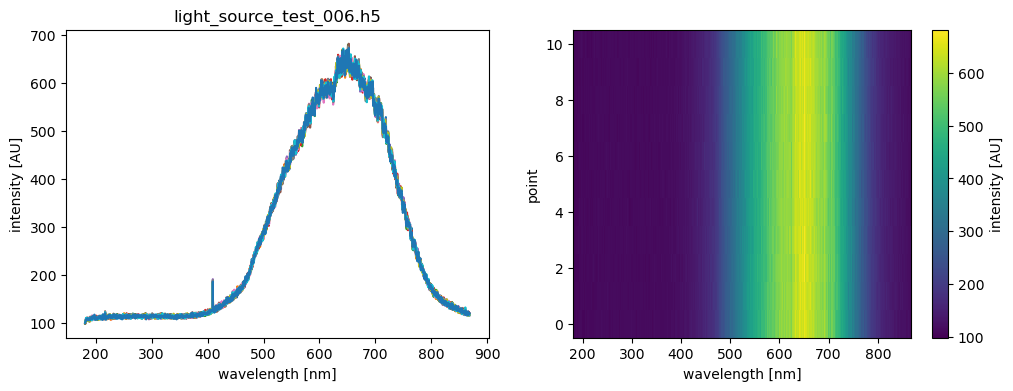

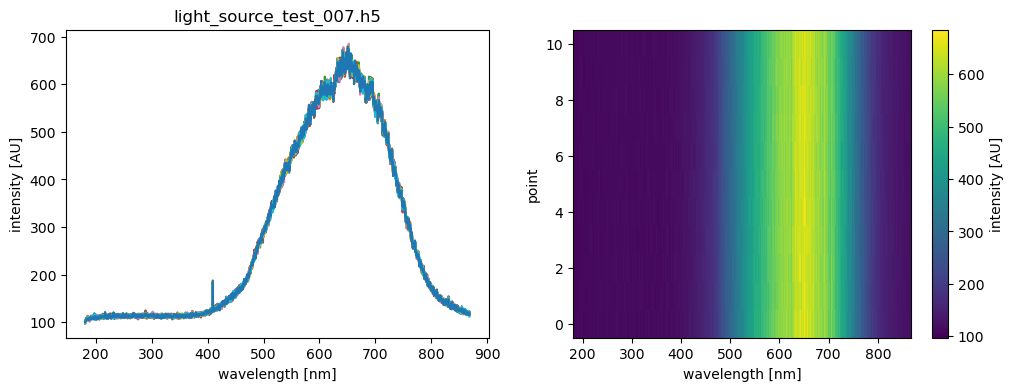

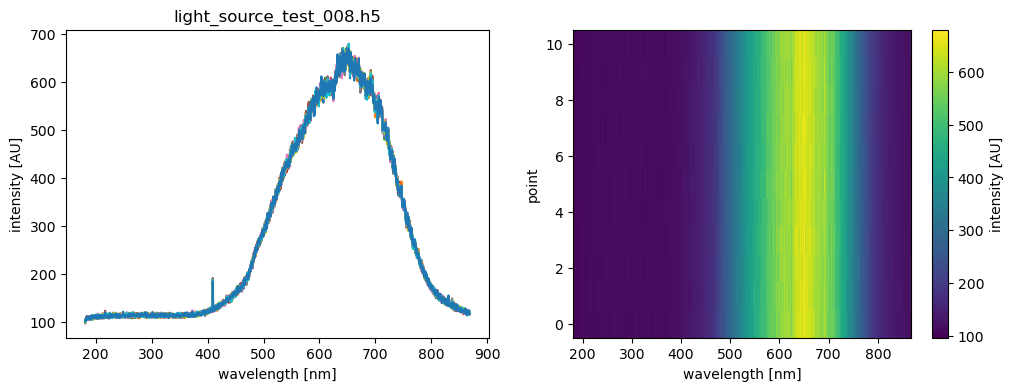

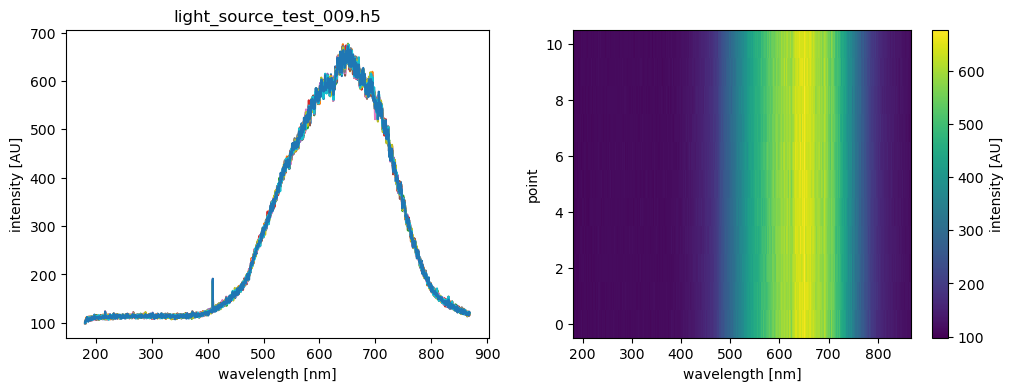

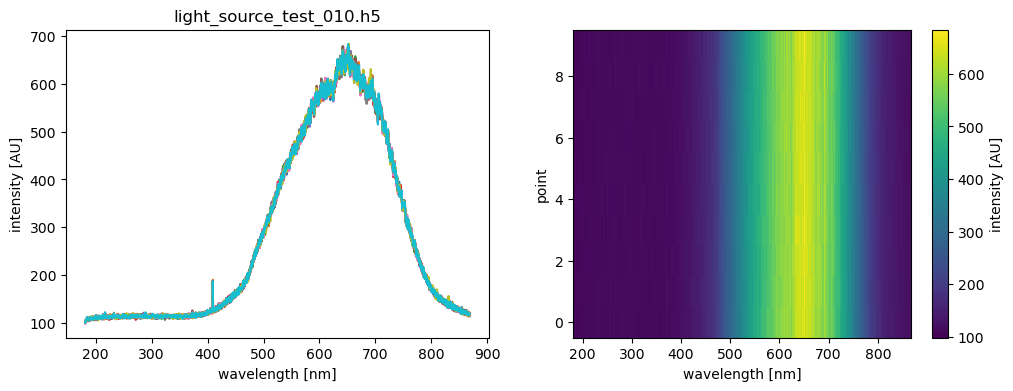

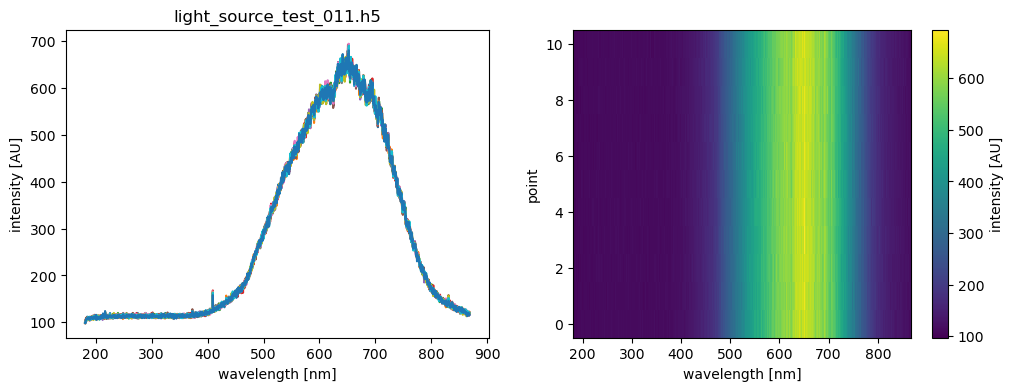

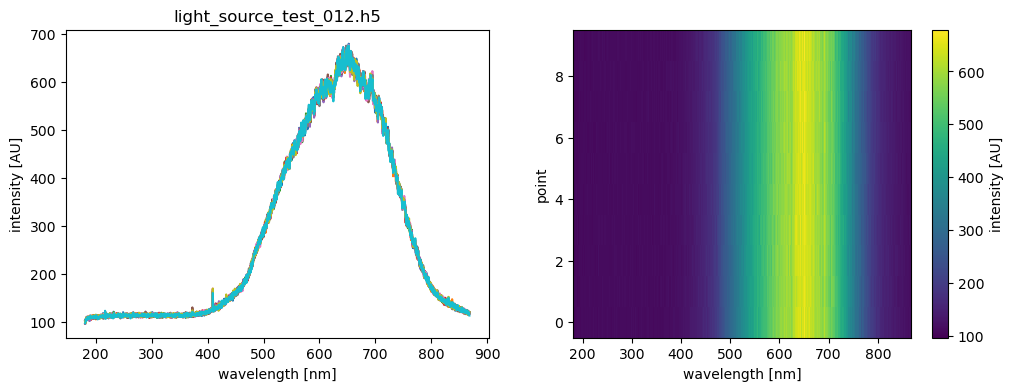

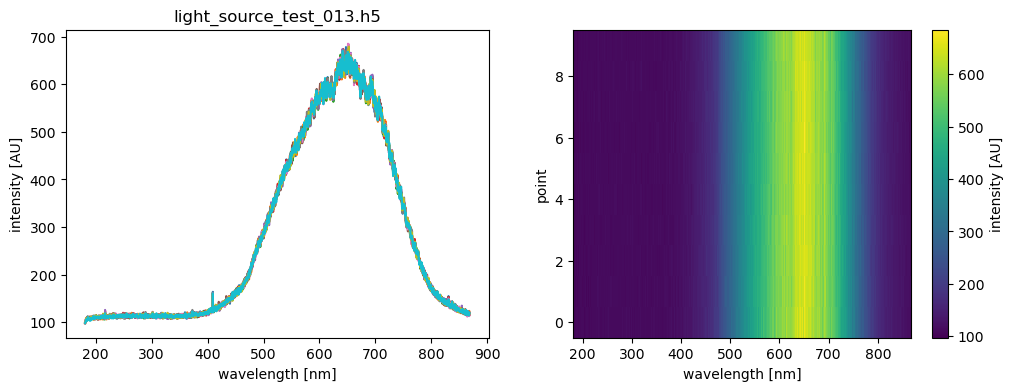

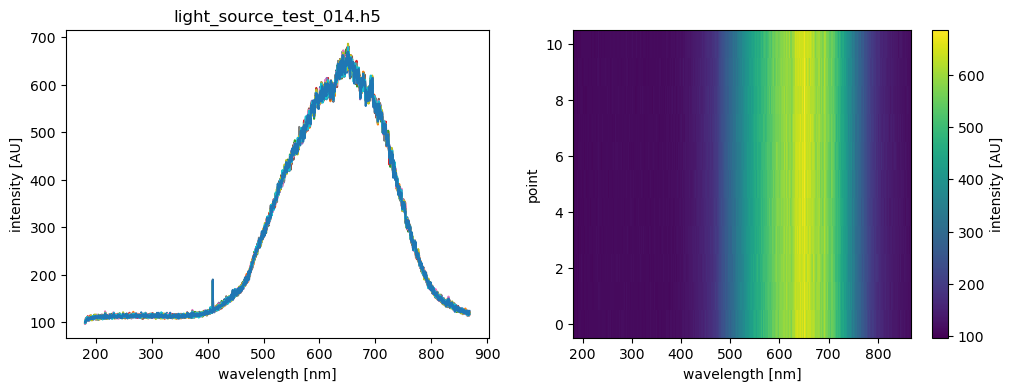

In [14]:
ds_list = []
μ_measurements = []
σ_measurements = []
for fname in sorted(base_path.glob('LightSource_3/*h5')):
    with h5py.File(fname,'r') as h5:
        key = list(h5.keys())[0]
        data = h5[key][()][:,:,1:]
        ds_static_list = []
        for point in data:
            da = xr.DataArray(point[1],dims=['wavelength'],coords={'wavelength':point[0]},name='intensity')
            da.attrs['units'] = 'AU'
            da.wavelength.attrs['units'] = 'nm'
          
            ds_static_list.append(da)
        
        ds = xr.Dataset()
        ds['intensity'] = xr.concat(ds_static_list,dim='point')
        ds['fname'] = fname.parts[-1]
        ds_list.append(ds)
        μ_measurements.append(ds['intensity'].mean(axis=0).values)
        σ_measurements.append(ds['intensity'].std(axis=0).values)
        
        fig,axes = plt.subplots(1,2,figsize=(12,4))
        plt.sca(axes[0])
        ds.intensity.plot.line(x='wavelength',add_legend=False)
        plt.gca().set(title=fname.parts[-1])
        
        plt.sca(axes[1])
        ds.intensity.plot(x='wavelength')#,vmin=95, vmax=2000)

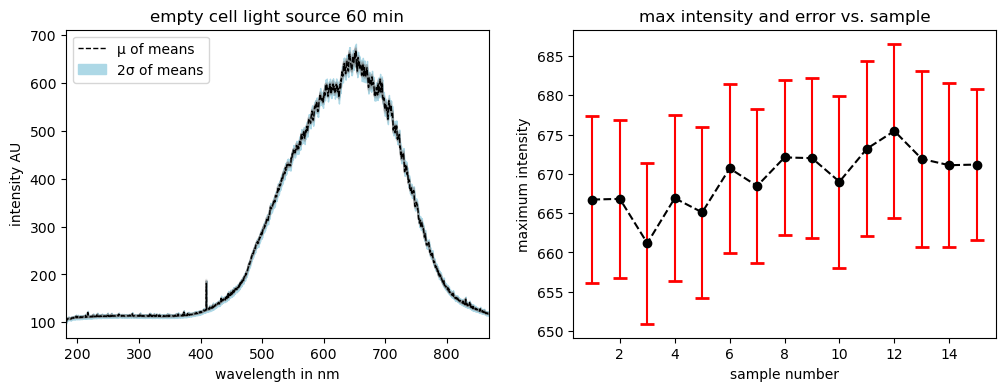

In [15]:
# Summary of the datasets
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(len(μ_measurements)):
    ax[0].plot(da.wavelength.values,μ_measurements[i],c='gray',alpha=0.1)#,label=f'scan {str(i+1).zfill(2)}')

mean_μ = np.mean(μ_measurements,axis=0)
mean_σ = np.mean(σ_measurements,axis=0)
λ  = da.wavelength.values
ax[0].plot(λ, mean_μ, c='k',linewidth=1,linestyle='--',label='μ of means')
ax[0].fill_between(λ, mean_μ, mean_μ+2*mean_σ,color='lightblue',label='2σ of means')
ax[0].fill_between(λ, mean_μ, mean_μ-2*mean_σ,color='lightblue')

ax[0].set(
    xlabel='wavelength in nm',
    ylabel='intensity AU',
    title ='empty cell light source 60 min',
    xlim=(min(da.wavelength.values),max(da.wavelength.values))
)
ax[0].legend()


ax[1].errorbar(np.linspace(1,15,15),[max(i) for i in μ_measurements],[max(i) for i in σ_measurements]
               ,ecolor='r',capsize=5,capthick=2,marker='o',linestyle='--',c='k')
ax[1].set(
    xlabel='sample number',
    ylabel='maximum intensity',
    title ='max intensity and error vs. sample',
)

fig.savefig("LightsourceStability_60_min.png",dpi=300)


### 90 minutes

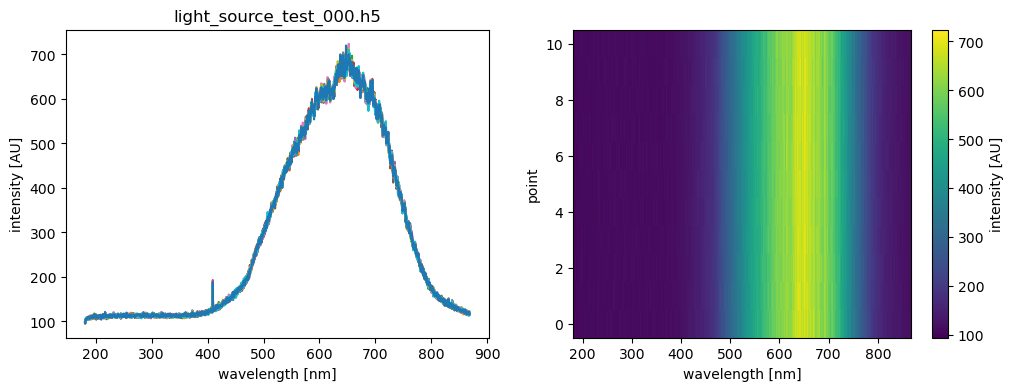

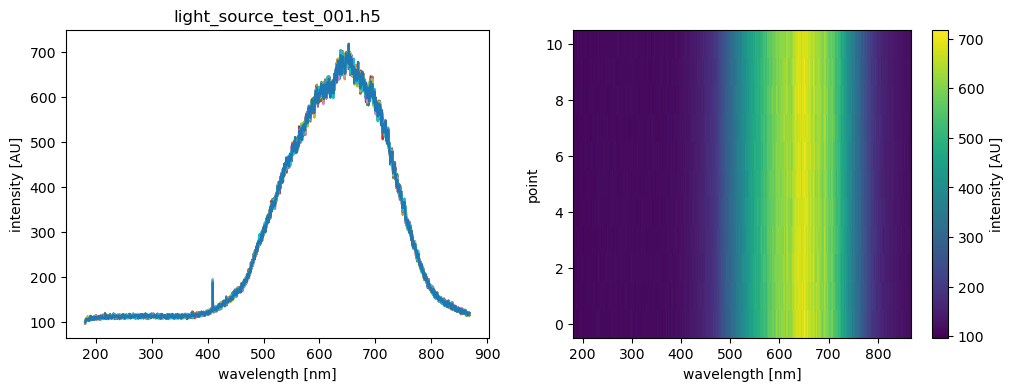

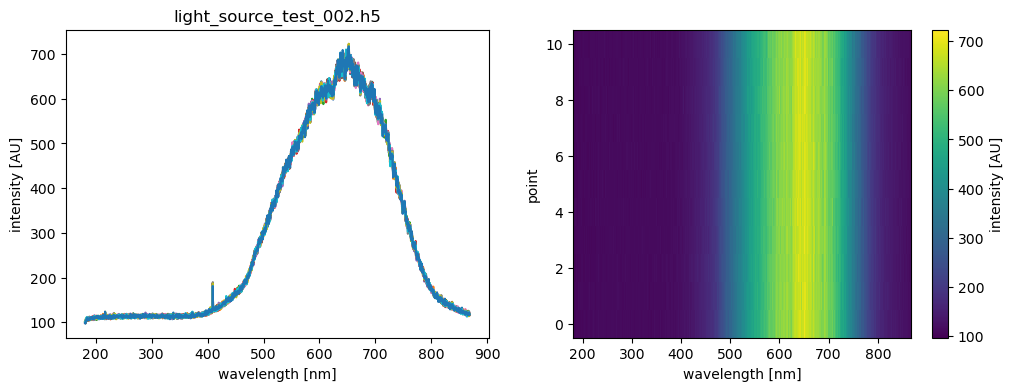

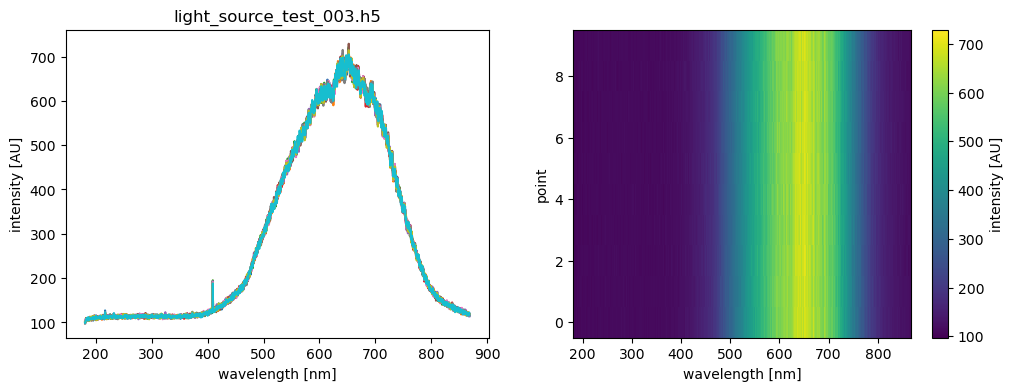

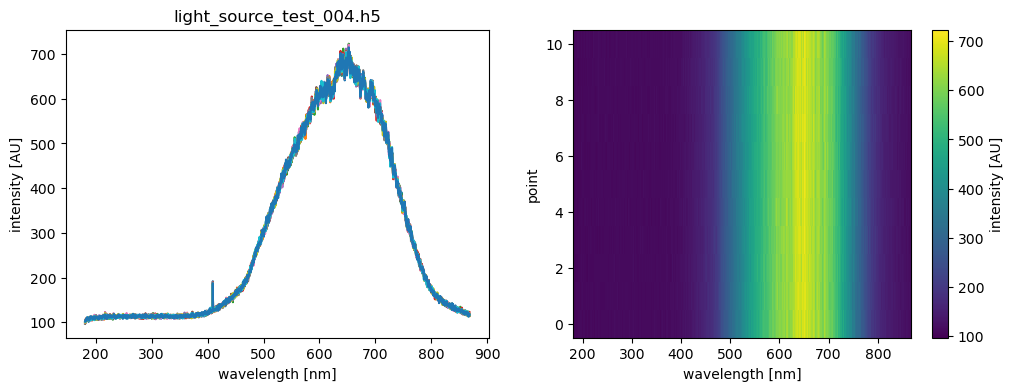

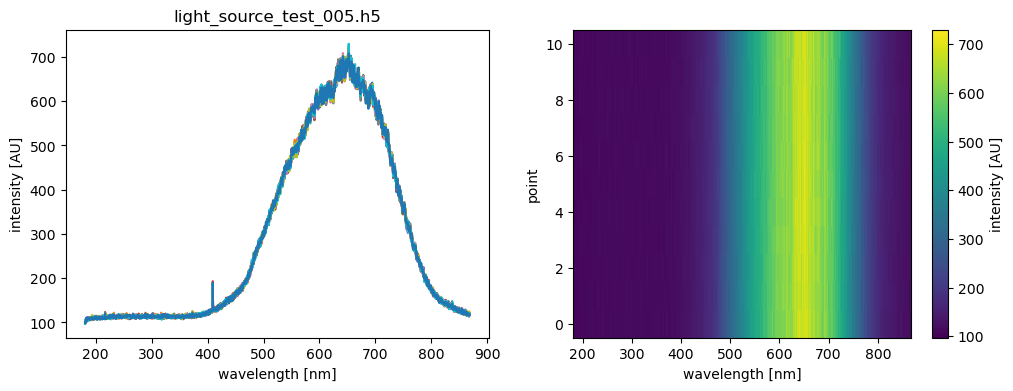

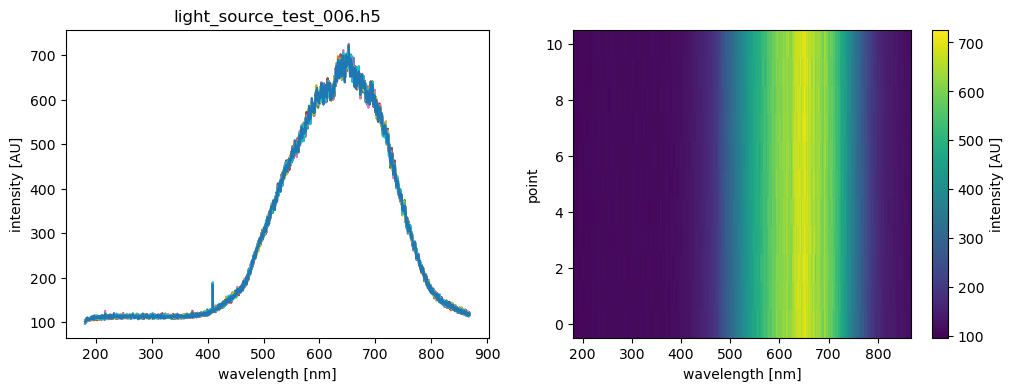

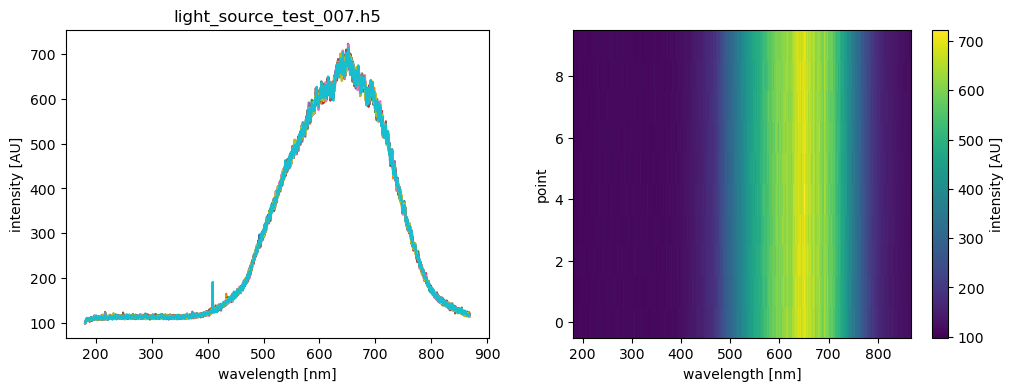

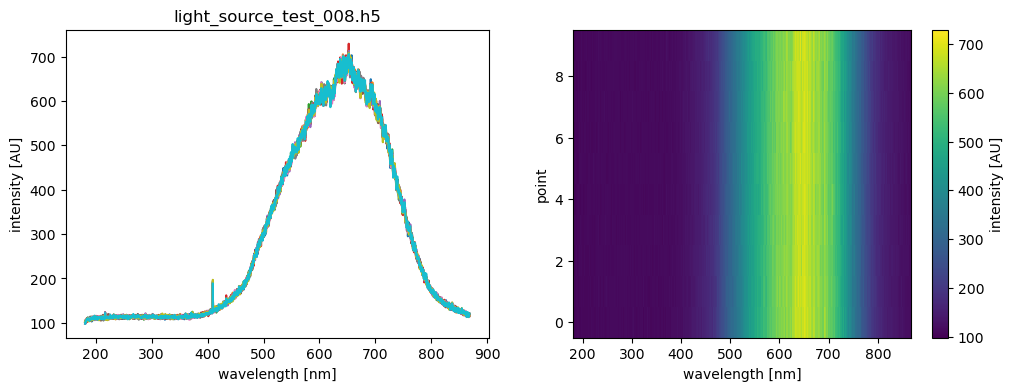

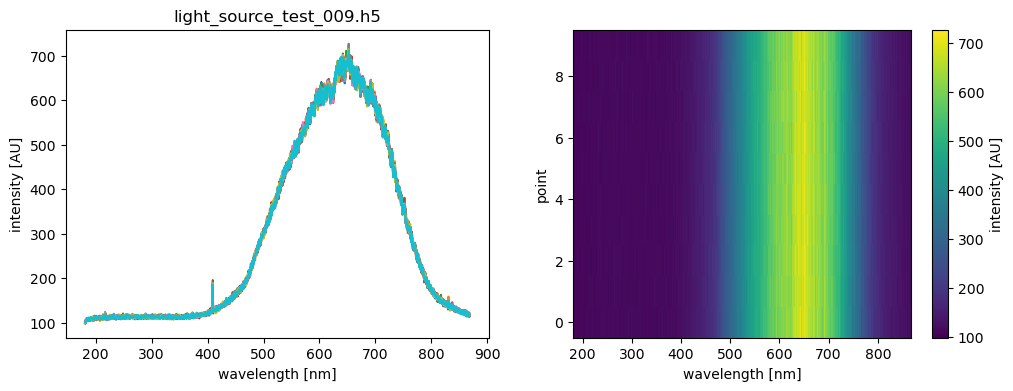

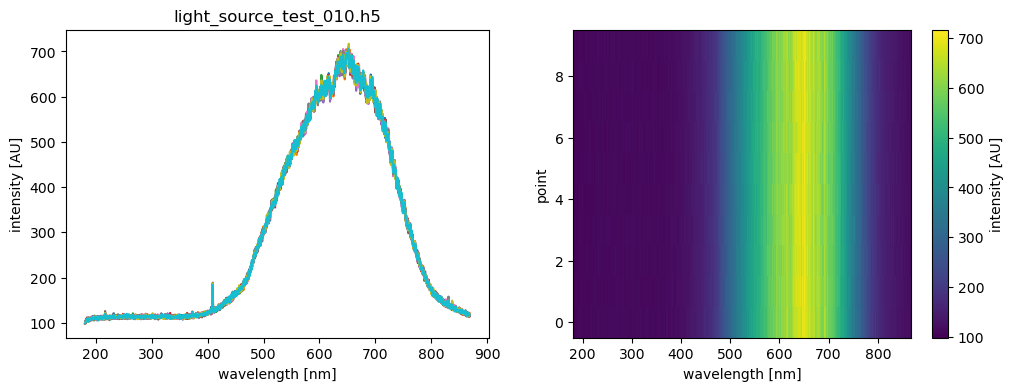

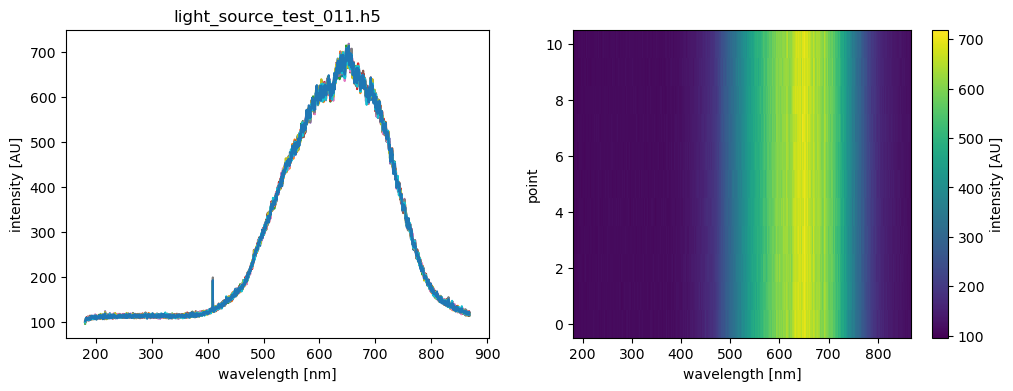

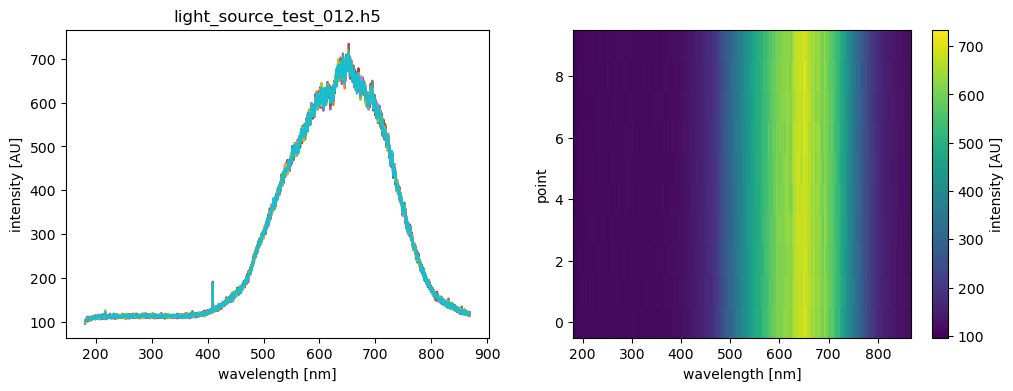

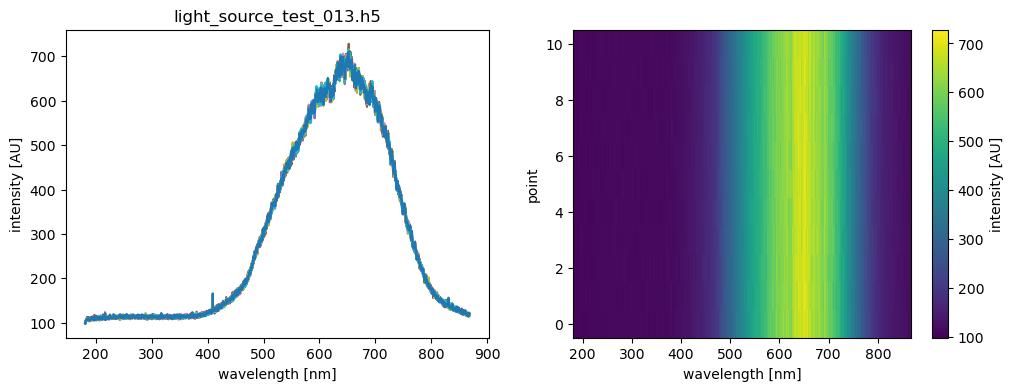

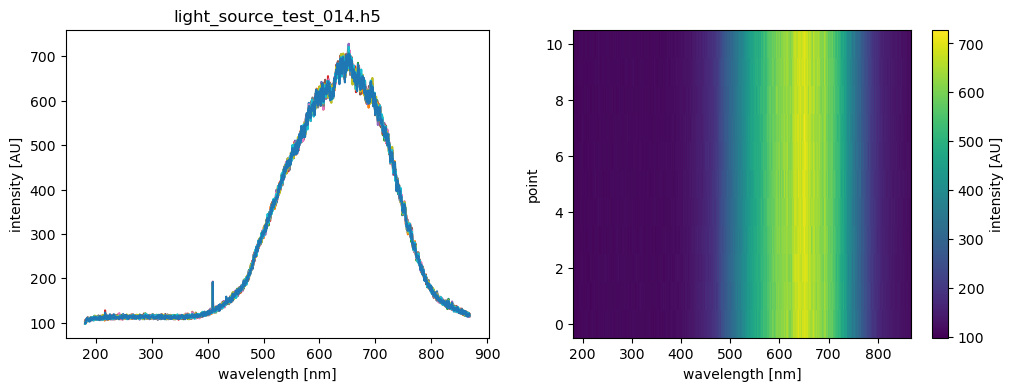

In [16]:
ds_list = []
μ_measurements = []
σ_measurements = []
for fname in sorted(base_path.glob('LightSource_4/*h5')):
    with h5py.File(fname,'r') as h5:
        key = list(h5.keys())[0]
        data = h5[key][()][:,:,1:]
        ds_static_list = []
        for point in data:
            da = xr.DataArray(point[1],dims=['wavelength'],coords={'wavelength':point[0]},name='intensity')
            da.attrs['units'] = 'AU'
            da.wavelength.attrs['units'] = 'nm'
          
            ds_static_list.append(da)
        
        ds = xr.Dataset()
        ds['intensity'] = xr.concat(ds_static_list,dim='point')
        ds['fname'] = fname.parts[-1]
        ds_list.append(ds)
        μ_measurements.append(ds['intensity'].mean(axis=0).values)
        σ_measurements.append(ds['intensity'].std(axis=0).values)
        
        fig,axes = plt.subplots(1,2,figsize=(12,4))
        plt.sca(axes[0])
        ds.intensity.plot.line(x='wavelength',add_legend=False)
        plt.gca().set(title=fname.parts[-1])
        
        plt.sca(axes[1])
        ds.intensity.plot(x='wavelength')#,vmin=95, vmax=2000)

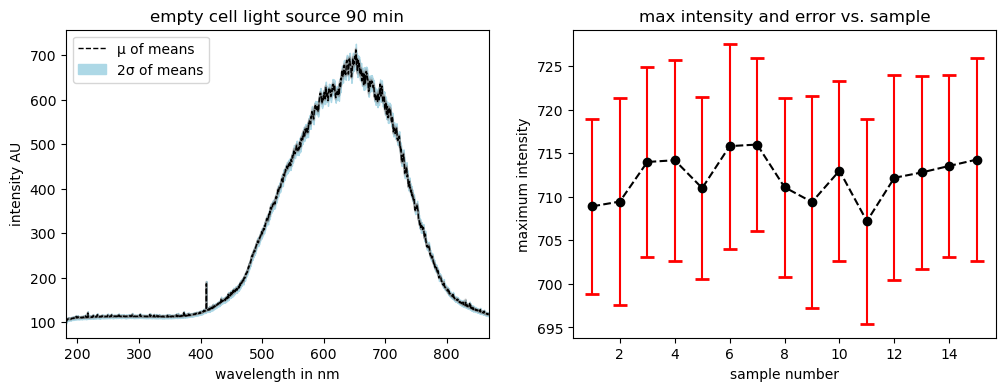

In [17]:
# Summary of the datasets
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(len(μ_measurements)):
    ax[0].plot(da.wavelength.values,μ_measurements[i],c='gray',alpha=0.1)#,label=f'scan {str(i+1).zfill(2)}')

mean_μ = np.mean(μ_measurements,axis=0)
mean_σ = np.mean(σ_measurements,axis=0)
λ  = da.wavelength.values
ax[0].plot(λ, mean_μ, c='k',linewidth=1,linestyle='--',label='μ of means')
ax[0].fill_between(λ, mean_μ, mean_μ+2*mean_σ,color='lightblue',label='2σ of means')
ax[0].fill_between(λ, mean_μ, mean_μ-2*mean_σ,color='lightblue')

ax[0].set(
    xlabel='wavelength in nm',
    ylabel='intensity AU',
    title ='empty cell light source 90 min',
    xlim=(min(da.wavelength.values),max(da.wavelength.values))
)
ax[0].legend()


ax[1].errorbar(np.linspace(1,15,15),[max(i) for i in μ_measurements],[max(i) for i in σ_measurements]
               ,ecolor='r',capsize=5,capthick=2,marker='o',linestyle='--',c='k')
ax[1].set(
    xlabel='sample number',
    ylabel='maximum intensity',
    title ='max intensity and error vs. sample',
)

fig.savefig("LightsourceStability_90_min.png",dpi=300)